In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(palette='deep',style='white',context='talk')

In [3]:
degs = pd.read_csv("./STAR_HTseq_out/Neural_diff_DEGs_all_TPM.csv")
degs.head()

gene_id gene_name     2D0   2D10   2D20R  2D10N   2D25    2D5  \
0  ENSG00000000005      TNMD    3.48   0.07    0.19   0.18   0.19   0.07   
1  ENSG00000001630   CYP51A1  171.46  25.27   96.43  30.76  95.77  25.50   
2  ENSG00000002016     RAD52   10.82  13.74   18.52  17.82  13.61  11.36   
3  ENSG00000002549      LAP3   32.49  28.60   23.15  14.05  26.67  29.67   
4  ENSG00000002586      CD99   16.79  95.37  115.89  79.92  88.67  27.40   

    2D5N     8D0    8D10  8D10N  8D20R   8D25    8D5   8D5N  
0   0.00    5.68    0.00   0.12   0.00   0.09   0.00   0.22  
1  26.13  133.97   31.95  27.77  74.01  69.51  22.55  30.49  
2  17.30    8.18   11.46  16.74  11.39  14.99  14.50  14.35  
3  17.88   26.12   35.76  15.42  19.03  19.06  30.29  18.01  
4  40.73   27.23  249.24  66.28  77.79  80.58  54.53  32.89

In [4]:
degs.columns

Index(['gene_id', 'gene_name', '2D0', '2D10', '2D20R', '2D10N', '2D25', '2D5',
       '2D5N', '8D0', '8D10', '8D10N', '8D20R', '8D25', '8D5', '8D5N'],
      dtype='object')

In [8]:
order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']

In [9]:
degs_tpm = degs[order]

## Kmeans clustering using scipy

In [7]:
import scipy.cluster.vq as scv

In [15]:
k=10
i=100
# scale array before k-means
w = scv.whiten(degs_tpm)
# if kmeans method used
centroids, distortion = scv.kmeans(w, k, iter=i)
code, dist = scv.vq(w, centroids) # code is the cluster index of orgrinal array
# if kmeans2 method 
centroids2, labels = scv.kmeans2(w, k,iter = i,minit='points') # labels  is the cluster index of original array


In [16]:
code

array([6, 2, 5, ..., 6, 6, 6])

In [17]:
labels

array([4, 8, 4, ..., 4, 4, 4])

In [18]:
len(labels)

8639

In [19]:
len(degs_tpm)

8639

In [20]:
degs_new = degs

In [21]:
degs_new['cluster'] = labels

In [22]:
degs_new.head()

gene_id gene_name     2D0   2D10   2D20R  2D10N   2D25    2D5  \
0  ENSG00000000005      TNMD    3.48   0.07    0.19   0.18   0.19   0.07   
1  ENSG00000001630   CYP51A1  171.46  25.27   96.43  30.76  95.77  25.50   
2  ENSG00000002016     RAD52   10.82  13.74   18.52  17.82  13.61  11.36   
3  ENSG00000002549      LAP3   32.49  28.60   23.15  14.05  26.67  29.67   
4  ENSG00000002586      CD99   16.79  95.37  115.89  79.92  88.67  27.40   

    2D5N     8D0    8D10  8D10N  8D20R   8D25    8D5   8D5N  cluster  
0   0.00    5.68    0.00   0.12   0.00   0.09   0.00   0.22        4  
1  26.13  133.97   31.95  27.77  74.01  69.51  22.55  30.49        8  
2  17.30    8.18   11.46  16.74  11.39  14.99  14.50  14.35        4  
3  17.88   26.12   35.76  15.42  19.03  19.06  30.29  18.01        4  
4  40.73   27.23  249.24  66.28  77.79  80.58  54.53  32.89        8

In [23]:
del degs_new['gene_id']
degs_new = degs_new.set_index(['cluster','gene_name'])

In [24]:
degs_new.head()

2D0   2D10   2D20R  2D10N   2D25    2D5   2D5N     8D0  \
cluster gene_name                                                              
4       TNMD         3.48   0.07    0.19   0.18   0.19   0.07   0.00    5.68   
8       CYP51A1    171.46  25.27   96.43  30.76  95.77  25.50  26.13  133.97   
4       RAD52       10.82  13.74   18.52  17.82  13.61  11.36  17.30    8.18   
        LAP3        32.49  28.60   23.15  14.05  26.67  29.67  17.88   26.12   
8       CD99        16.79  95.37  115.89  79.92  88.67  27.40  40.73   27.23   

                     8D10  8D10N  8D20R   8D25    8D5   8D5N  
cluster gene_name                                             
4       TNMD         0.00   0.12   0.00   0.09   0.00   0.22  
8       CYP51A1     31.95  27.77  74.01  69.51  22.55  30.49  
4       RAD52       11.46  16.74  11.39  14.99  14.50  14.35  
        LAP3        35.76  15.42  19.03  19.06  30.29  18.01  
8       CD99       249.24  66.28  77.79  80.58  54.53  32.89

In [25]:
degs_new.sort_index(inplace=True)

In [26]:
degs_new.head()

2D0    2D10   2D20R   2D10N    2D25     2D5    2D5N  \
cluster gene_name                                                            
0       ABI2         74.32   65.98  141.17  129.58  135.84   74.33  110.35   
        ABRACL      244.92  180.50   97.51  140.92  115.72  245.76  163.84   
        AC005795.1  124.17  101.05   73.23   44.46  103.69  131.43   73.57   
        AC013394.2   68.86  101.87  151.59  150.96  147.99  146.03  141.29   
        AC093106.7   98.99  225.48  140.80  253.38  143.22  245.72  242.97   

                       8D0    8D10   8D10N   8D20R    8D25     8D5    8D5N  
cluster gene_name                                                           
0       ABI2         65.27   44.61  122.97  149.11  143.72   53.97   80.32  
        ABRACL      180.96  177.12  136.27   90.61   73.82  149.90  183.08  
        AC005795.1  110.41  114.16   61.21   52.67   65.07  112.04   67.23  
        AC013394.2   58.76   86.45  110.39  173.39  187.24  128.50  168.46  
        AC093106.7  133.63  149.63  185.46  129.00  106.48  204.73  250.17

In [27]:
degs_new_log = np.log2(degs_new+1)

In [29]:
degs_new_log = degs_new_log[order]

In [30]:
degs_new_log.head()

2D0       8D0      2D5N      8D5N     2D10N  \
cluster gene_name                                                      
0       ABI2        6.234961  6.050284  6.798958  6.345538  7.028790   
        ABRACL      7.942045  7.507478  7.364923  7.524189  7.148934   
        AC005795.1  6.967745  6.799735  6.220523  6.092334  5.506526   
        AC013394.2  6.126395  5.901108  7.152690  7.404801  7.247548   
        AC093106.7  6.643712  7.072856  7.930560  7.972520  7.990841   

                       8D10N     2D20R     8D20R      2D25      8D25  \
cluster gene_name                                                      
0       ABI2        6.953847  7.151473  7.229876  7.096346  7.177121   
        ABRACL      7.100873  6.622198  6.517433  6.866908  6.225352   
        AC005795.1  5.959075  6.213930  5.746044  6.709980  6.045923   
        AC013394.2  6.799476  7.253517  7.446174  7.219072  7.556429   
        AC093106.7  7.542722  7.147714  7.022368  7.172127  6.747924   

                         2D5       8D5      2D10      8D10  
cluster gene_name                                           
0       ABI2        6.235153  5.780573  6.065658  5.511278  
        ABRACL      7.946965  7.237449  7.503826  7.476706  
        AC005795.1  7.049086  6.820690  6.673132  6.847496  
        AC013394.2  7.199967  7.016808  6.684678  6.450386  
        AC093106.7  7.946731  7.684608  7.823240  7.234865

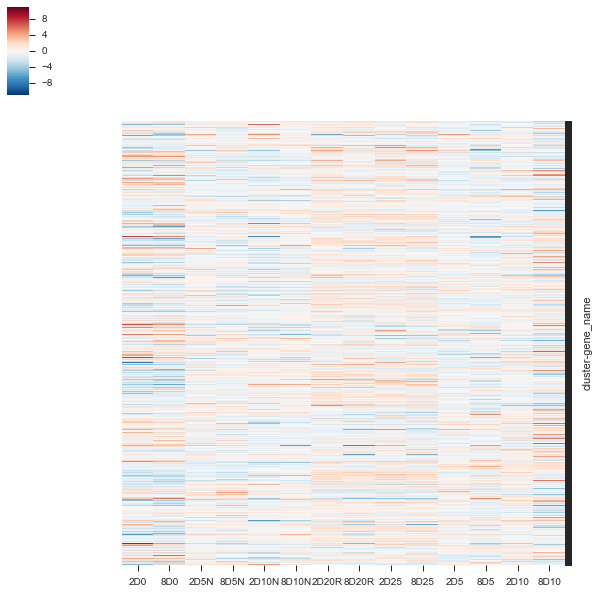

In [33]:
sns.clustermap(degs_new_log,row_cluster=False,col_cluster=False,z_score=0, yFalse)

In [37]:
degs_new.head()

2D0    2D10   2D20R   2D10N    2D25     2D5    2D5N  \
cluster gene_name                                                            
0       ABI2         74.32   65.98  141.17  129.58  135.84   74.33  110.35   
        ABRACL      244.92  180.50   97.51  140.92  115.72  245.76  163.84   
        AC005795.1  124.17  101.05   73.23   44.46  103.69  131.43   73.57   
        AC013394.2   68.86  101.87  151.59  150.96  147.99  146.03  141.29   
        AC093106.7   98.99  225.48  140.80  253.38  143.22  245.72  242.97   

                       8D0    8D10   8D10N   8D20R    8D25     8D5    8D5N  
cluster gene_name                                                           
0       ABI2         65.27   44.61  122.97  149.11  143.72   53.97   80.32  
        ABRACL      180.96  177.12  136.27   90.61   73.82  149.90  183.08  
        AC005795.1  110.41  114.16   61.21   52.67   65.07  112.04   67.23  
        AC013394.2   58.76   86.45  110.39  173.39  187.24  128.50  168.46  
        AC093106.7  133.63  149.63  185.46  129.00  106.48  204.73  250.17

In [38]:
degs_new = degs_new[order]

In [39]:
degs_new.head()

2D0     8D0    2D5N    8D5N   2D10N   8D10N   2D20R  \
cluster gene_name                                                            
0       ABI2         74.32   65.27  110.35   80.32  129.58  122.97  141.17   
        ABRACL      244.92  180.96  163.84  183.08  140.92  136.27   97.51   
        AC005795.1  124.17  110.41   73.57   67.23   44.46   61.21   73.23   
        AC013394.2   68.86   58.76  141.29  168.46  150.96  110.39  151.59   
        AC093106.7   98.99  133.63  242.97  250.17  253.38  185.46  140.80   

                     8D20R    2D25    8D25     2D5     8D5    2D10    8D10  
cluster gene_name                                                           
0       ABI2        149.11  135.84  143.72   74.33   53.97   65.98   44.61  
        ABRACL       90.61  115.72   73.82  245.76  149.90  180.50  177.12  
        AC005795.1   52.67  103.69   65.07  131.43  112.04  101.05  114.16  
        AC013394.2  173.39  147.99  187.24  146.03  128.50  101.87   86.45  
        AC093106.7  129.00  143.22  106.48  245.72  204.73  225.48  149.63

In [40]:
degs_new.to_csv("java_tree_view.txt",sep="\t")

In [46]:
del degs['cluster']

In [48]:
degs.set_index('gene_name',inplace=True)

In [49]:
degs.head()

2D0   2D10   2D20R  2D10N   2D25    2D5   2D5N     8D0    8D10  \
gene_name                                                                      
TNMD         3.48   0.07    0.19   0.18   0.19   0.07   0.00    5.68    0.00   
CYP51A1    171.46  25.27   96.43  30.76  95.77  25.50  26.13  133.97   31.95   
RAD52       10.82  13.74   18.52  17.82  13.61  11.36  17.30    8.18   11.46   
LAP3        32.49  28.60   23.15  14.05  26.67  29.67  17.88   26.12   35.76   
CD99        16.79  95.37  115.89  79.92  88.67  27.40  40.73   27.23  249.24   

           8D10N  8D20R   8D25    8D5   8D5N  
gene_name                                     
TNMD        0.12   0.00   0.09   0.00   0.22  
CYP51A1    27.77  74.01  69.51  22.55  30.49  
RAD52      16.74  11.39  14.99  14.50  14.35  
LAP3       15.42  19.03  19.06  30.29  18.01  
CD99       66.28  77.79  80.58  54.53  32.89

In [50]:
degs_log = np.log2(degs+1)

In [51]:
k=33
i=100
# scale array before k-means
w = scv.whiten(degs_log)
# if kmeans method used
centroids, distortion = scv.kmeans(w, k, iter=i)
code, dist = scv.vq(w, centroids) # code is the cluster index of orgrinal array
# if kmeans2 method 
centroids2, labels = scv.kmeans2(w, k,iter = i,minit='points') # labels  is the cluster index of original array

In [52]:
degs_log['cluster'] = code

In [55]:
degs_log = degs_log.reset_index()
degs_log_new = degs_log.set_index(['cluster','gene_name'])

In [57]:
degs_log_new.head()

index       2D0      2D10     2D20R     2D10N      2D25  \
cluster gene_name                                                            
5       TNMD           0  2.163499  0.097611  0.250962  0.238787  0.250962   
21      CYP51A1        1  7.430118  4.715344  6.606294  4.989139  6.596488   
15      RAD52          2  3.563158  3.881665  4.286881  4.234195  3.868884   
12      LAP3           3  5.065658  4.887525  4.593951  3.911692  4.790251   
16      CD99           4  4.152995  6.590512  6.869008  6.338424  6.486553   

                        2D5      2D5N       8D0      8D10     8D10N     8D20R  \
cluster gene_name                                                               
5       TNMD       0.097611  0.000000  2.739848  0.000000  0.163499  0.000000   
21      CYP51A1    4.727920  4.761817  7.076495  5.042207  4.846493  6.229011   
15      RAD52      3.627607  4.193772  3.198494  3.639232  4.148934  3.631104   
12      LAP3       4.938756  4.238787  4.761285  5.200065  4.037382  4.324091   
16      CD99       4.827819  5.383013  4.819157  7.967169  6.072106  6.299941   

                       8D25       8D5      8D5N  
cluster gene_name                                
5       TNMD       0.124328  0.000000  0.286881  
21      CYP51A1    6.139756  4.557655  4.976822  
15      RAD52      3.999098  3.954196  3.940167  
12      LAP3       4.326250  4.967630  4.248687  
16      CD99       6.350144  5.795195  5.082788

In [59]:
degs_log_new.drop('index',axis=1,inplace=True)

In [60]:
degs_log_new.head()

2D0      2D10     2D20R     2D10N      2D25       2D5  \
cluster gene_name                                                               
5       TNMD       2.163499  0.097611  0.250962  0.238787  0.250962  0.097611   
21      CYP51A1    7.430118  4.715344  6.606294  4.989139  6.596488  4.727920   
15      RAD52      3.563158  3.881665  4.286881  4.234195  3.868884  3.627607   
12      LAP3       5.065658  4.887525  4.593951  3.911692  4.790251  4.938756   
16      CD99       4.152995  6.590512  6.869008  6.338424  6.486553  4.827819   

                       2D5N       8D0      8D10     8D10N     8D20R      8D25  \
cluster gene_name                                                               
5       TNMD       0.000000  2.739848  0.000000  0.163499  0.000000  0.124328   
21      CYP51A1    4.761817  7.076495  5.042207  4.846493  6.229011  6.139756   
15      RAD52      4.193772  3.198494  3.639232  4.148934  3.631104  3.999098   
12      LAP3       4.238787  4.761285  5.200065  4.037382  4.324091  4.326250   
16      CD99       5.383013  4.819157  7.967169  6.072106  6.299941  6.350144   

                        8D5      8D5N  
cluster gene_name                      
5       TNMD       0.000000  0.286881  
21      CYP51A1    4.557655  4.976822  
15      RAD52      3.954196  3.940167  
12      LAP3       4.967630  4.248687  
16      CD99       5.795195  5.082788

In [63]:
lab = list(set(code))
lab

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [65]:
import scipy.cluster.hierarchy as sch

In [72]:
degs_log_new = degs_log_new[order]

In [73]:
degs_log_new.head()

2D0       8D0      2D5N      8D5N     2D10N     8D10N  \
cluster gene_name                                                               
5       TNMD       2.163499  2.739848  0.000000  0.286881  0.238787  0.163499   
21      CYP51A1    7.430118  7.076495  4.761817  4.976822  4.989139  4.846493   
15      RAD52      3.563158  3.198494  4.193772  3.940167  4.234195  4.148934   
12      LAP3       5.065658  4.761285  4.238787  4.248687  3.911692  4.037382   
16      CD99       4.152995  4.819157  5.383013  5.082788  6.338424  6.072106   

                      2D20R     8D20R      2D25      8D25       2D5       8D5  \
cluster gene_name                                                               
5       TNMD       0.250962  0.000000  0.250962  0.124328  0.097611  0.000000   
21      CYP51A1    6.606294  6.229011  6.596488  6.139756  4.727920  4.557655   
15      RAD52      4.286881  3.631104  3.868884  3.999098  3.627607  3.954196   
12      LAP3       4.593951  4.324091  4.790251  4.326250  4.938756  4.967630   
16      CD99       6.869008  6.299941  6.486553  6.350144  4.827819  5.795195   

                       2D10      8D10  
cluster gene_name                      
5       TNMD       0.097611  0.000000  
21      CYP51A1    4.715344  5.042207  
15      RAD52      3.881665  3.639232  
12      LAP3       4.887525  5.200065  
16      CD99       6.590512  7.967169

In [5]:
def scale(y, c=True, sc=True):
    '''
    If ‘scale’ is‘TRUE’ then scaling is done by dividing the (centered) columns of
   ‘x’ by their standard deviations if ‘center’ is ‘TRUE’, and the
     root mean square otherwise.  If ‘scale’ is ‘FALSE’, no scaling is done.

     The root-mean-square for a (possibly centered) column is defined
     as sqrt(sum(x^2)/(n-1)), where x is a vector of the non-missing
     values and n is the number of non-missing values.  In the case
     ‘center = TRUE’, this is the same as the standard deviation, but
     in general it is not.
    '''
    x = y.copy()

    if c:
        x -= x.mean()
    if sc and c:
        x /= x.std()
    elif sc:
        x /= np.sqrt(x.pow(2).sum().div(x.count() - 1))
    return x

In [76]:
myscale_degs = scale(degs_log_new.T).T

In [77]:
myscale_degs.head()

2D0       8D0      2D5N      8D5N     2D10N     8D10N  \
cluster gene_name                                                               
5       TNMD       1.987037  2.658585 -0.533815 -0.199549 -0.255587 -0.343311   
21      CYP51A1    1.796045  1.444955 -0.853137 -0.639673 -0.627444 -0.769068   
15      RAD52     -0.993805 -2.178363  1.054652  0.230853  1.185960  0.909003   
12      LAP3       1.159652  0.414008 -0.865992 -0.841740 -1.667299 -1.359387   
16      CD99      -1.783571 -1.115345 -0.549743 -0.850898  0.408627  0.141484   

                      2D20R     8D20R      2D25      8D25       2D5       8D5  \
cluster gene_name                                                               
5       TNMD      -0.241401 -0.533815 -0.241401 -0.388951 -0.420081 -0.533815   
21      CYP51A1    0.978124  0.603544  0.968388  0.514928 -0.886791 -1.055836   
15      RAD52      1.357104 -0.773092 -0.000698  0.422283 -0.784453  0.276426   
12      LAP3       0.004079 -0.657018  0.484967 -0.651728  0.848771  0.919504   
16      CD99       0.940854  0.370024  0.557215  0.420383 -1.106657 -0.136284   

                       2D10      8D10  
cluster gene_name                      
5       TNMD      -0.420081 -0.533815  
21      CYP51A1   -0.899277 -0.574757  
15      RAD52      0.040817 -0.746689  
12      LAP3       0.723267  1.488916  
16      CD99       0.661496  2.042416

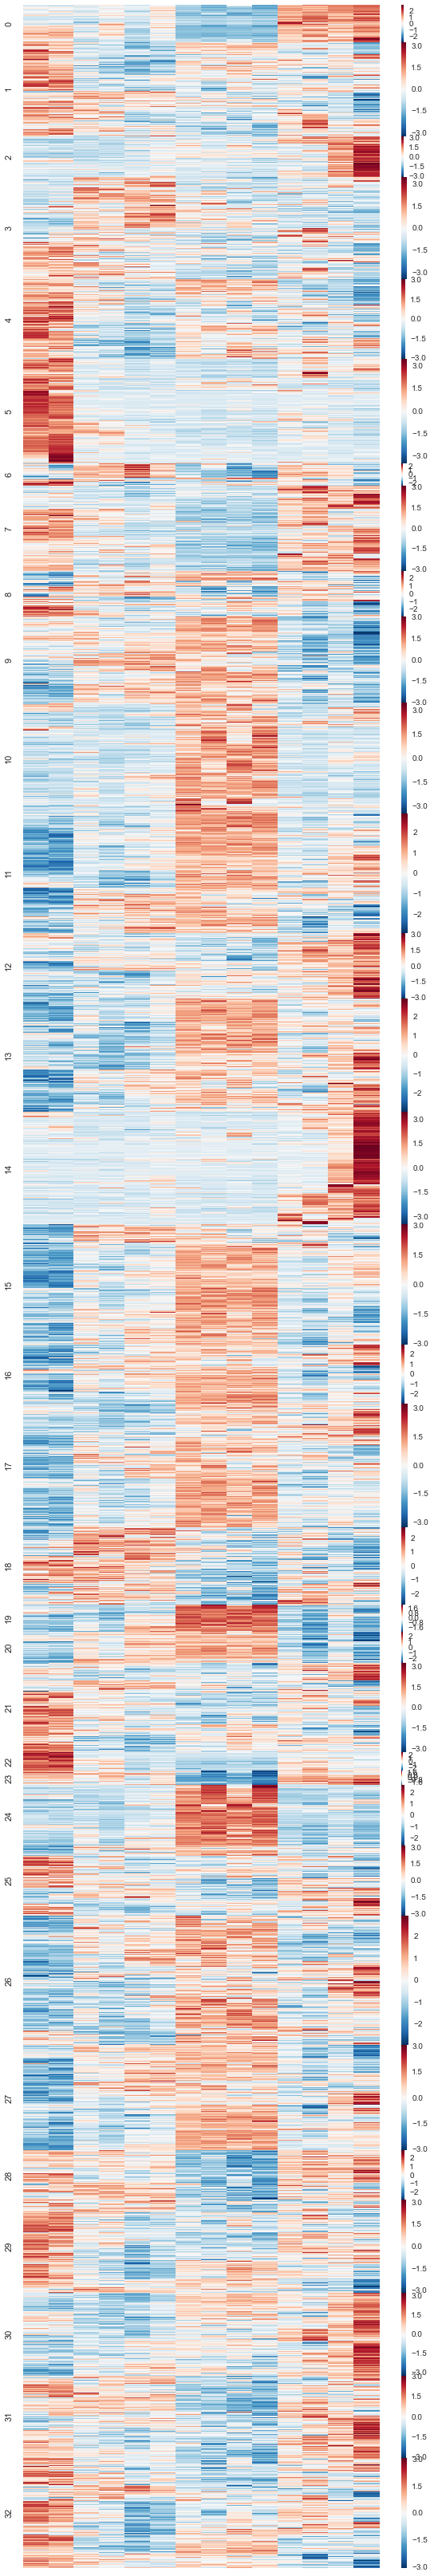

In [82]:
gs = plt.GridSpec(9000,1)
m=0
fig = plt.figure(figsize=(10,60)) 
for i in range(len(lab)):
    cell = lab[i]
    data = myscale_degs.loc[cell]
    length = len(data)
    Z = sch.linkage(data,'ward')
    D = sch.dendrogram(Z, no_plot=True)
    index = D['leaves']
   
    ax = fig.add_subplot(gs[m:m+length])
    sns.heatmap(data.iloc[index],linewidths=0, ax =ax, xticklabels=False, yticklabels=False)
    ax.set_ylabel(cell)
    m = m+length

In [ ]:
sns.set_style("whitegrid")
sns.set_palette('muted',n_colors=6) 
ax2 = sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=tf_reshape,palette="Set2", 
                     split=True,scale="width", scale_hue=False, )

In [83]:
fig.savefig("DEGs.png",dpi=300)
fig.savefig("DEGS.png.pdf")

In [84]:
degs_log_new.head()

2D0       8D0      2D5N      8D5N     2D10N     8D10N  \
cluster gene_name                                                               
5       TNMD       2.163499  2.739848  0.000000  0.286881  0.238787  0.163499   
21      CYP51A1    7.430118  7.076495  4.761817  4.976822  4.989139  4.846493   
15      RAD52      3.563158  3.198494  4.193772  3.940167  4.234195  4.148934   
12      LAP3       5.065658  4.761285  4.238787  4.248687  3.911692  4.037382   
16      CD99       4.152995  4.819157  5.383013  5.082788  6.338424  6.072106   

                      2D20R     8D20R      2D25      8D25       2D5       8D5  \
cluster gene_name                                                               
5       TNMD       0.250962  0.000000  0.250962  0.124328  0.097611  0.000000   
21      CYP51A1    6.606294  6.229011  6.596488  6.139756  4.727920  4.557655   
15      RAD52      4.286881  3.631104  3.868884  3.999098  3.627607  3.954196   
12      LAP3       4.593951  4.324091  4.790251  4.326250  4.938756  4.967630   
16      CD99       6.869008  6.299941  6.486553  6.350144  4.827819  5.795195   

                       2D10      8D10  
cluster gene_name                      
5       TNMD       0.097611  0.000000  
21      CYP51A1    4.715344  5.042207  
15      RAD52      3.881665  3.639232  
12      LAP3       4.887525  5.200065  
16      CD99       6.590512  7.967169

In [85]:
data = degs_log_new.loc[1]

In [86]:
data_stack = data.stack()
data_stack.head()

gene_name       
SLC45A4    2D0      4.553975
           8D0      4.012569
           2D5N     3.106013
           8D5N     2.467279
           2D10N    2.283922
dtype: float64

In [93]:
data_stack = data_stack.reset_index()

In [94]:
data_stack.columns = ['gene_name',"time","TPM"]

In [95]:
data_stack.head()

gene_name   time       TPM
0   SLC45A4    2D0  4.553975
1   SLC45A4    8D0  4.012569
2   SLC45A4   2D5N  3.106013
3   SLC45A4   8D5N  2.467279
4   SLC45A4  2D10N  2.283922

In [96]:
data_stack['time2'] =None
data_stack['cell_line'] = None

In [97]:
for i in range(len(data_stack['TPM'])):
    data_stack.ix[i,'time2'] = data_stack['time'][i][1:]
    data_stack.ix[i,'cell_line'] = 'SHhESC'+ data_stack['time'][i][0]

In [98]:
data_stack.head()

gene_name   time       TPM time2 cell_line
0   SLC45A4    2D0  4.553975    D0   SHhESC2
1   SLC45A4    8D0  4.012569    D0   SHhESC8
2   SLC45A4   2D5N  3.106013   D5N   SHhESC2
3   SLC45A4   8D5N  2.467279   D5N   SHhESC8
4   SLC45A4  2D10N  2.283922  D10N   SHhESC2

In [43]:
xaxis_order = ['D0','D5N',"D10N","D20R","D25","D5","D10"]

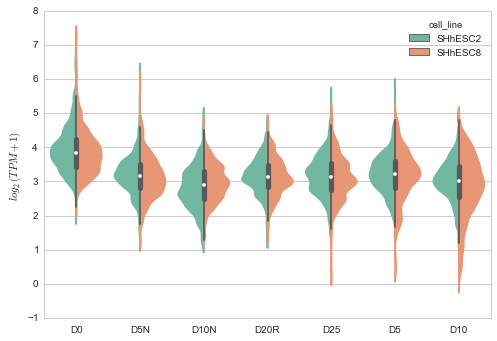

In [105]:
ax1 = sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data_stack,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2)
ax1.set_xlabel("")
ax1.set_ylabel("$log_2(TPM+1)$ ")
#ax3.set_title("Transcription Factor",fontsize=20)

In [107]:
for i in range(len(lab)):
    cell = lab[i]
    data = degs_log_new.loc[cell]
    data_stack = data.stack()
    data_stack = data_stack.reset_index()
    data_stack.columns = ['gene_name',"time","TPM"]
    data_stack['time2'] =None
    data_stack['cell_line'] = None
    for j in range(len(data_stack['TPM'])):
        data_stack.ix[j,'time2'] = data_stack['time'][j][1:]
        data_stack.ix[j,'cell_line'] = 'SHhESC'+ data_stack['time'][j][0]
    data_stack.to_csv("Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")


In [108]:
import glob

In [111]:
files = glob.glob("*_cluster_*")

In [112]:
files

['Neual_diff_DEGs_cluster_0_log2TPM.csv',
 'Neual_diff_DEGs_cluster_10_log2TPM.csv',
 'Neual_diff_DEGs_cluster_11_log2TPM.csv',
 'Neual_diff_DEGs_cluster_12_log2TPM.csv',
 'Neual_diff_DEGs_cluster_13_log2TPM.csv',
 'Neual_diff_DEGs_cluster_14_log2TPM.csv',
 'Neual_diff_DEGs_cluster_15_log2TPM.csv',
 'Neual_diff_DEGs_cluster_16_log2TPM.csv',
 'Neual_diff_DEGs_cluster_17_log2TPM.csv',
 'Neual_diff_DEGs_cluster_18_log2TPM.csv',
 'Neual_diff_DEGs_cluster_19_log2TPM.csv',
 'Neual_diff_DEGs_cluster_1_log2TPM.csv',
 'Neual_diff_DEGs_cluster_20_log2TPM.csv',
 'Neual_diff_DEGs_cluster_21_log2TPM.csv',
 'Neual_diff_DEGs_cluster_22_log2TPM.csv',
 'Neual_diff_DEGs_cluster_23_log2TPM.csv',
 'Neual_diff_DEGs_cluster_24_log2TPM.csv',
 'Neual_diff_DEGs_cluster_25_log2TPM.csv',
 'Neual_diff_DEGs_cluster_26_log2TPM.csv',
 'Neual_diff_DEGs_cluster_27_log2TPM.csv',
 'Neual_diff_DEGs_cluster_28_log2TPM.csv',
 'Neual_diff_DEGs_cluster_29_log2TPM.csv',
 'Neual_diff_DEGs_cluster_2_log2TPM.csv',
 'Neual_diff_D

In [113]:
data_stack.head()

gene_name   time       TPM time2 cell_line
0   DNAJC11    2D0  5.080231    D0   SHhESC2
1   DNAJC11    8D0  5.019702    D0   SHhESC8
2   DNAJC11   2D5N  4.459432   D5N   SHhESC2
3   DNAJC11   8D5N  4.317594   D5N   SHhESC8
4   DNAJC11  2D10N  3.770829  D10N   SHhESC2

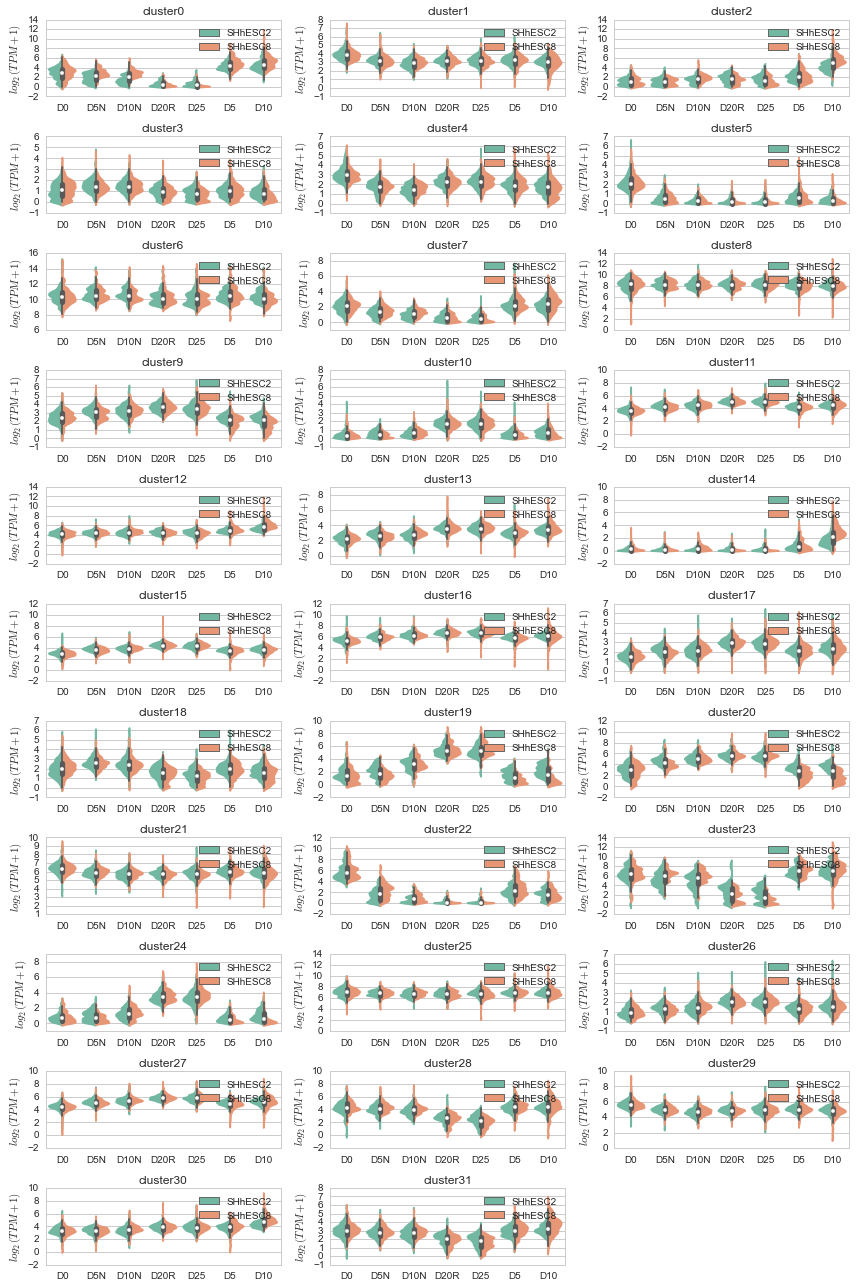

In [117]:
fig = plt.figure(figsize=(12,18))
for i in np.arange(0,32):
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    ax = fig.add_subplot(11,3,i+1)
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel("$log_2(TPM+1)$ ")
    ax.set_title("cluster"+str(i))
    ax.legend()
fig.tight_layout()
#ax3.set_title("Transcription Factor",fontsize=20)

In [123]:
sns.set_style("white")

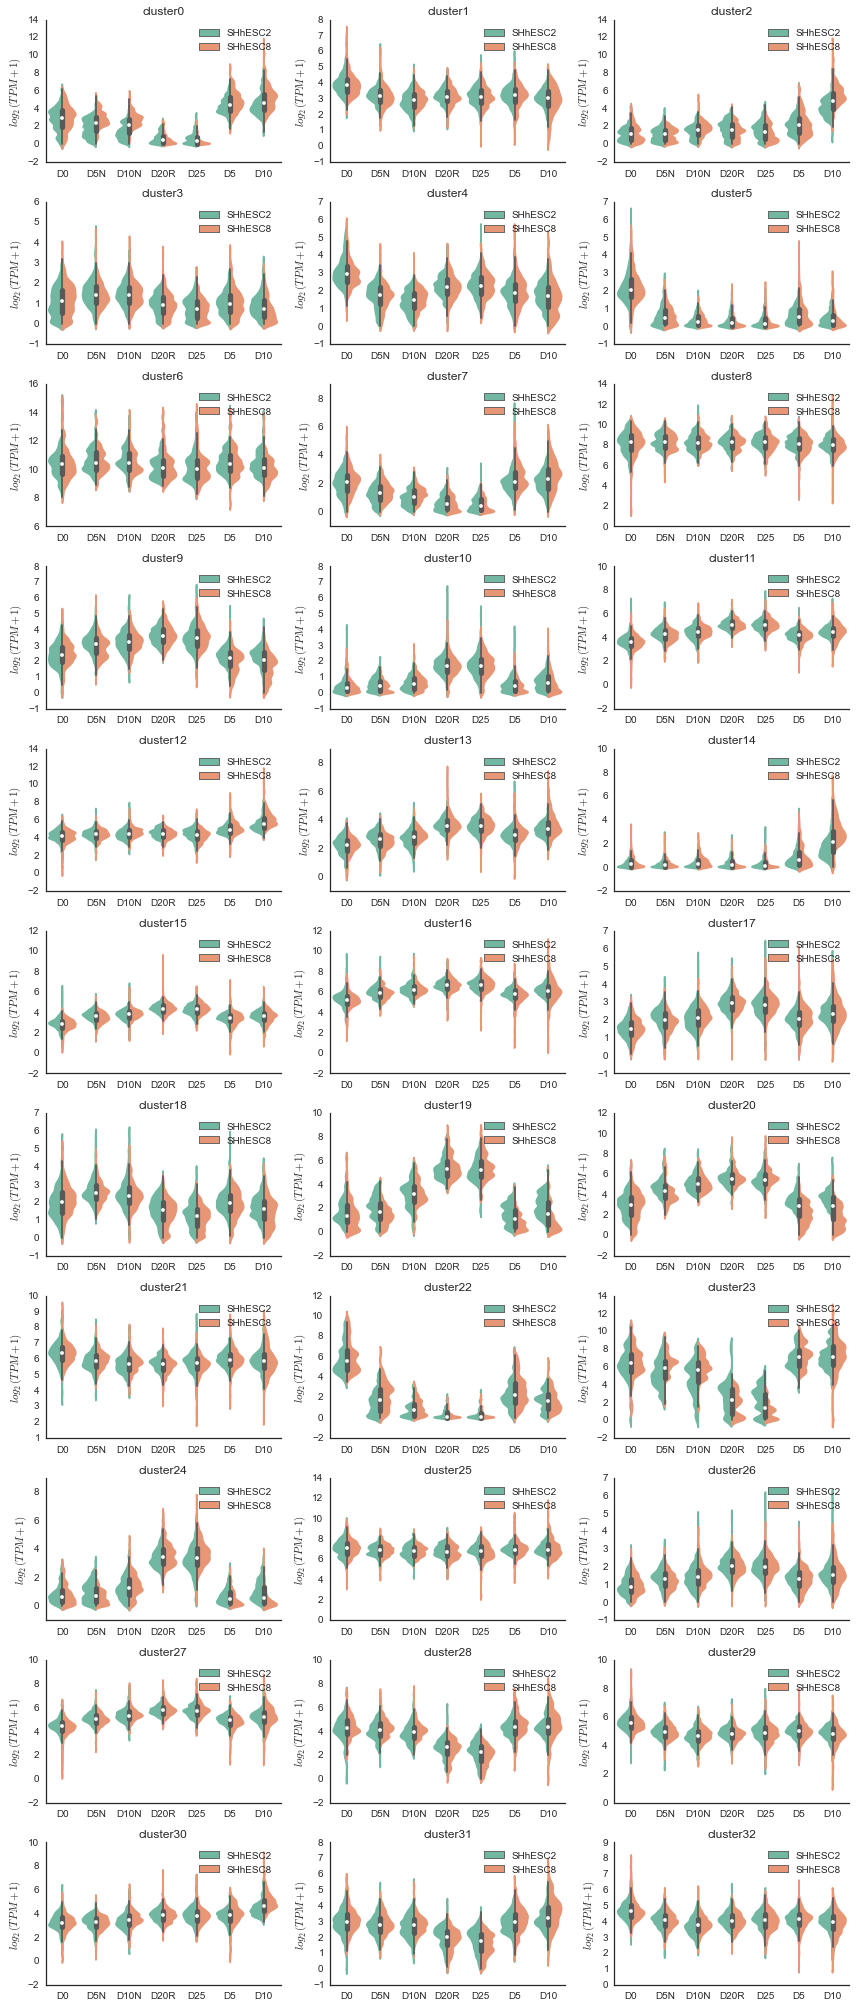

In [130]:
fig = plt.figure(figsize=(12,28))
for i in np.arange(0,33):
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    ax = fig.add_subplot(11,3,i+1)
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel("$log_2(TPM+1)$ ")
    ax.set_title("cluster"+str(i))
    ax.legend()
sns.despine()
fig.tight_layout()
#ax3.set_title("Transcription Factor",fontsize=20)

In [131]:
fig.savefig("Neural_diff_degs_volin_plots_of_each_cluster-2.pdf")

In [132]:
fig.savefig("Neural_diff_degs_volin_plots_of_each_cluster-2.png",dpi = 300)

In [129]:
myscale_degs.index.levels[0]

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
           dtype='int64', name='cluster')

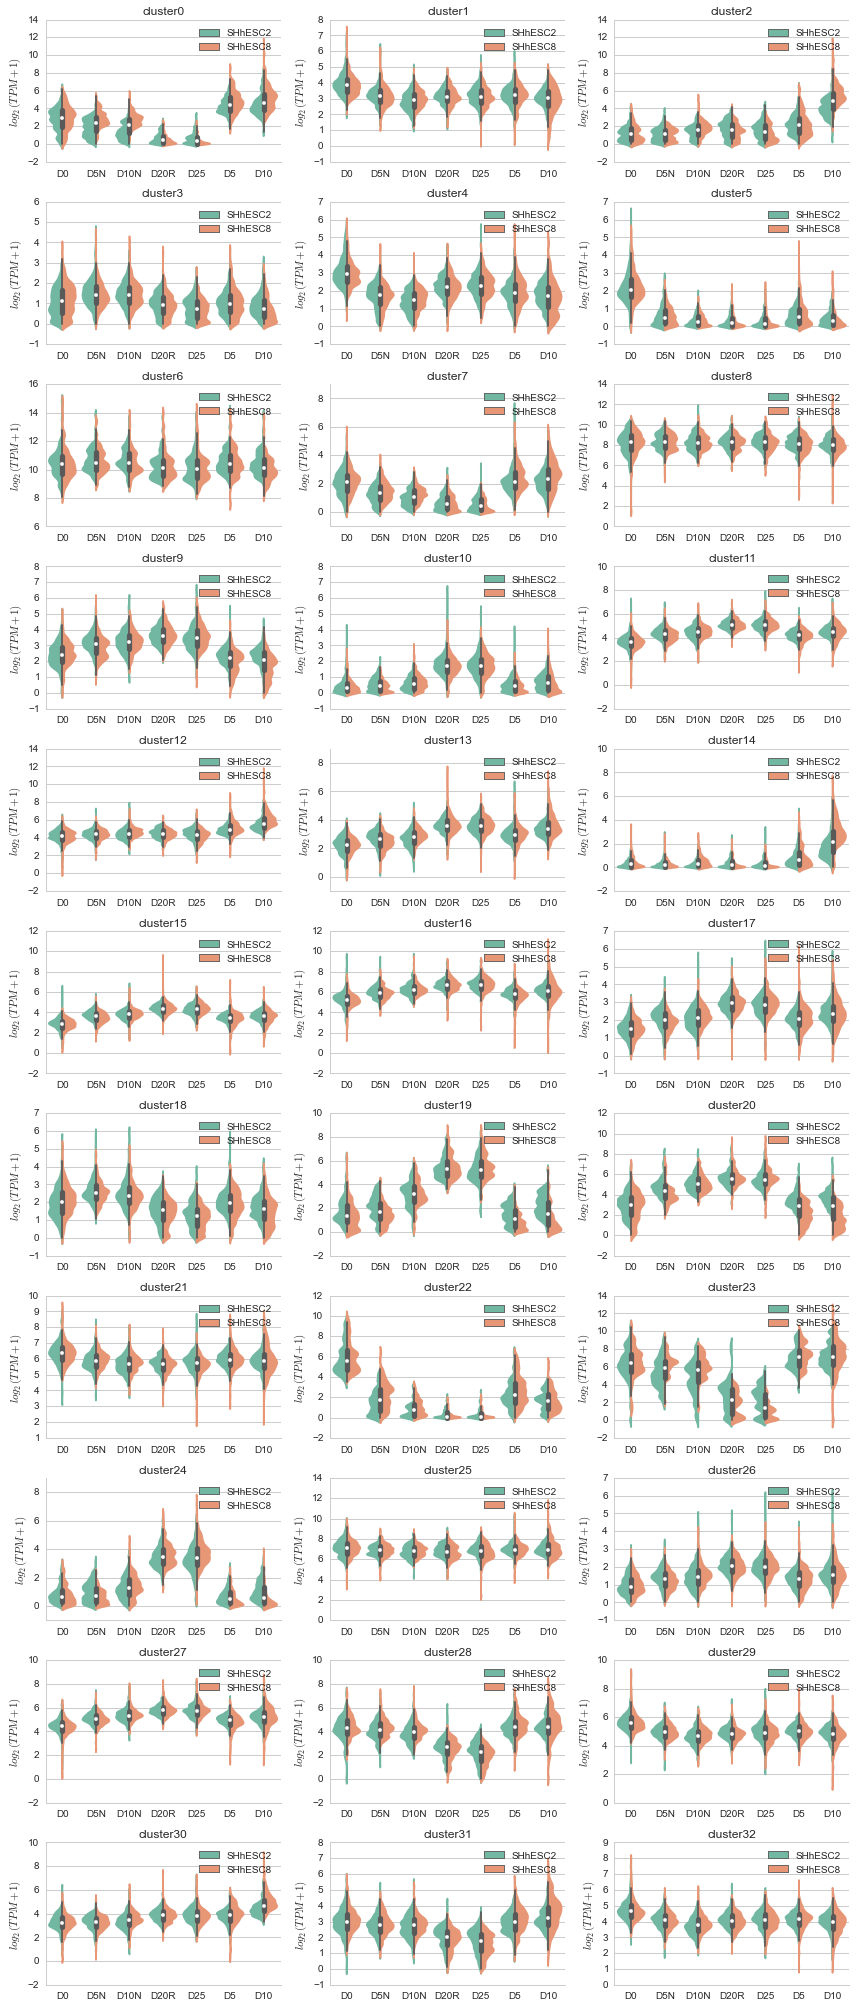

In [133]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,28))
for i in np.arange(0,33):
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    ax = fig.add_subplot(11,3,i+1)
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel("$log_2(TPM+1)$ ")
    ax.set_title("cluster"+str(i))
    ax.legend()
sns.despine()
fig.tight_layout()


In [134]:
fig.savefig("Neural_diff_degs_volin_plots_of_each_cluster.pdf")
fig.savefig("Neural_diff_degs_volin_plots_of_each_cluster.png",dpi = 300)

In [5]:
deg_kmeans = pd.read_table("Neural_diff_DEGS_Kmeans_K_G30_list.txt",)
deg_kmeans.head()

NAME  GROUP       2D0       8D0      2D5N      8D5N     2D10N  \
0     EWEIGHT    NaN  1.000000  1.000000  1.000000  1.000000  1.000000   
1  AC005795.1      0  0.316934  0.222814 -0.102508 -0.174725 -0.506111   
2        CNN2      0  0.228507  0.223166 -0.036925 -0.235477 -0.123486   
3        DSG2      0  0.246968  0.145095 -0.006494 -0.042947 -0.194970   
4        ETF1      0  0.531771  0.149417 -0.195311 -0.078819 -0.281793   

      8D10N     2D20R     8D20R      2D25      8D25       2D5       8D5  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1 -0.249900 -0.106220 -0.370316  0.172493 -0.200894  0.362470  0.234558   
2 -0.053202 -0.244952 -0.496134  0.168423 -0.341762 -0.036061  0.117421   
3 -0.127932 -0.168698 -0.369087 -0.242854 -0.458235  0.270098  0.215229   
4 -0.325972 -0.197843 -0.386276  0.158943 -0.189723  0.351907  0.120150   

       2D10      8D10  
0  1.000000  1.000000  
1  0.151825  0.249580  
2  0.492160  0.338321  
3  0.226344  0.507483  
4  0.266575  0.076975

In [6]:
deg_kmeans.drop(0,axis=0,inplace=True)

In [7]:
deg_kmeans.head()

NAME  GROUP       2D0       8D0      2D5N      8D5N     2D10N  \
1  AC005795.1      0  0.316934  0.222814 -0.102508 -0.174725 -0.506111   
2        CNN2      0  0.228507  0.223166 -0.036925 -0.235477 -0.123486   
3        DSG2      0  0.246968  0.145095 -0.006494 -0.042947 -0.194970   
4        ETF1      0  0.531771  0.149417 -0.195311 -0.078819 -0.281793   
5        FLII      0  0.186601  0.269794  0.011798 -0.294402 -0.412757   

      8D10N     2D20R     8D20R      2D25      8D25       2D5       8D5  \
1 -0.249900 -0.106220 -0.370316  0.172493 -0.200894  0.362470  0.234558   
2 -0.053202 -0.244952 -0.496134  0.168423 -0.341762 -0.036061  0.117421   
3 -0.127932 -0.168698 -0.369087 -0.242854 -0.458235  0.270098  0.215229   
4 -0.325972 -0.197843 -0.386276  0.158943 -0.189723  0.351907  0.120150   
5 -0.099891 -0.009680 -0.300468 -0.257510 -0.158049  0.072187  0.255212   

       2D10      8D10  
1  0.151825  0.249580  
2  0.492160  0.338321  
3  0.226344  0.507483  
4  0.266575  0.076975  
5  0.143286  0.593879

In [8]:

deg_kmeans_group = deg_kmeans.set_index(['GROUP','NAME'])

1 loops, best of 3: 4min 49s per loop


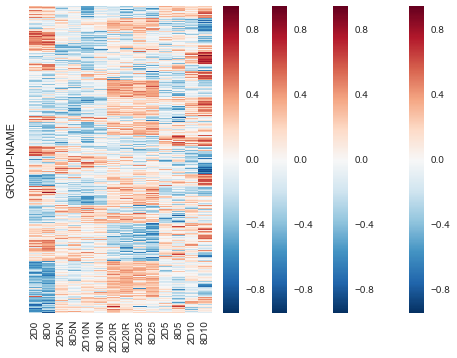

In [9]:
%%timeit
sns.heatmap(deg_kmeans_group,yticklabels=False)

In [11]:
group = deg_kmeans[['NAME','GROUP']]

In [12]:
order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']

In [13]:
degs = pd.read_csv("./STAR_HTseq_out/Neural_diff_DEGs_all_TPM.csv")
degs.head()

gene_id gene_name     2D0   2D10   2D20R  2D10N   2D25    2D5  \
0  ENSG00000000005      TNMD    3.48   0.07    0.19   0.18   0.19   0.07   
1  ENSG00000001630   CYP51A1  171.46  25.27   96.43  30.76  95.77  25.50   
2  ENSG00000002016     RAD52   10.82  13.74   18.52  17.82  13.61  11.36   
3  ENSG00000002549      LAP3   32.49  28.60   23.15  14.05  26.67  29.67   
4  ENSG00000002586      CD99   16.79  95.37  115.89  79.92  88.67  27.40   

    2D5N     8D0    8D10  8D10N  8D20R   8D25    8D5   8D5N  
0   0.00    5.68    0.00   0.12   0.00   0.09   0.00   0.22  
1  26.13  133.97   31.95  27.77  74.01  69.51  22.55  30.49  
2  17.30    8.18   11.46  16.74  11.39  14.99  14.50  14.35  
3  17.88   26.12   35.76  15.42  19.03  19.06  30.29  18.01  
4  40.73   27.23  249.24  66.28  77.79  80.58  54.53  32.89

In [14]:
degs2 = degs[order]

In [16]:
degs2.head()

2D0     8D0   2D5N   8D5N  2D10N  8D10N   2D20R  8D20R   2D25   8D25  \
0    3.48    5.68   0.00   0.22   0.18   0.12    0.19   0.00   0.19   0.09   
1  171.46  133.97  26.13  30.49  30.76  27.77   96.43  74.01  95.77  69.51   
2   10.82    8.18  17.30  14.35  17.82  16.74   18.52  11.39  13.61  14.99   
3   32.49   26.12  17.88  18.01  14.05  15.42   23.15  19.03  26.67  19.06   
4   16.79   27.23  40.73  32.89  79.92  66.28  115.89  77.79  88.67  80.58   

     2D5    8D5   2D10    8D10  
0   0.07   0.00   0.07    0.00  
1  25.50  22.55  25.27   31.95  
2  11.36  14.50  13.74   11.46  
3  29.67  30.29  28.60   35.76  
4  27.40  54.53  95.37  249.24

In [28]:
degs_k30 = pd.merge(degs,group,left_on='gene_name',right_on='NAME',how='inner')

In [29]:
degs_k30.head()

gene_id gene_name     2D0   2D10   2D20R  2D10N   2D25    2D5  \
0  ENSG00000000005      TNMD    3.48   0.07    0.19   0.18   0.19   0.07   
1  ENSG00000001630   CYP51A1  171.46  25.27   96.43  30.76  95.77  25.50   
2  ENSG00000002016     RAD52   10.82  13.74   18.52  17.82  13.61  11.36   
3  ENSG00000002549      LAP3   32.49  28.60   23.15  14.05  26.67  29.67   
4  ENSG00000002586      CD99   16.79  95.37  115.89  79.92  88.67  27.40   

    2D5N     8D0    8D10  8D10N  8D20R   8D25    8D5   8D5N     NAME  GROUP  
0   0.00    5.68    0.00   0.12   0.00   0.09   0.00   0.22     TNMD     13  
1  26.13  133.97   31.95  27.77  74.01  69.51  22.55  30.49  CYP51A1     17  
2  17.30    8.18   11.46  16.74  11.39  14.99  14.50  14.35    RAD52     27  
3  17.88   26.12   35.76  15.42  19.03  19.06  30.29  18.01     LAP3      0  
4  40.73   27.23  249.24  66.28  77.79  80.58  54.53  32.89     CD99     16

In [31]:
np.where(degs_k30.gene_name != degs_k30.NAME)

(array([], dtype=int64),)

In [32]:
degs_k30.set_index(['GROUP','NAME'],inplace=True)

In [33]:
degs_k30.drop(['gene_id','gene_name'],axis=1,inplace=True)

In [34]:
degs_k30.head()

2D0   2D10   2D20R  2D10N   2D25    2D5   2D5N     8D0  \
GROUP NAME                                                                 
13    TNMD       3.48   0.07    0.19   0.18   0.19   0.07   0.00    5.68   
17    CYP51A1  171.46  25.27   96.43  30.76  95.77  25.50  26.13  133.97   
27    RAD52     10.82  13.74   18.52  17.82  13.61  11.36  17.30    8.18   
0     LAP3      32.49  28.60   23.15  14.05  26.67  29.67  17.88   26.12   
16    CD99      16.79  95.37  115.89  79.92  88.67  27.40  40.73   27.23   

                 8D10  8D10N  8D20R   8D25    8D5   8D5N  
GROUP NAME                                                
13    TNMD       0.00   0.12   0.00   0.09   0.00   0.22  
17    CYP51A1   31.95  27.77  74.01  69.51  22.55  30.49  
27    RAD52     11.46  16.74  11.39  14.99  14.50  14.35  
0     LAP3      35.76  15.42  19.03  19.06  30.29  18.01  
16    CD99     249.24  66.28  77.79  80.58  54.53  32.89

In [35]:
degs_k30 = degs_k30[order]

In [36]:
degs_k30.shape

(8631, 14)

In [37]:
degs_k30_log = np.log2(degs_k30+1)

In [38]:
cls = degs_k30_log.index.levels[0].unique()

In [39]:
cls

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.])

In [40]:
degs_k30_log.sort_index(inplace=True)
degs_k30_log.head()

2D0       8D0      2D5N      8D5N     2D10N     8D10N  \
GROUP NAME                                                                     
0     AC005795.1  6.967745  6.799735  6.220523  6.092334  5.506526  5.959075   
      AC016716.1  4.380591  3.358959  2.939227  2.859970  3.099295  2.711495   
      AC093110.3  0.000000  2.014355  1.722466  1.389567  1.292782  1.124328   
      ACTRT3      1.899176  1.744161  0.731183  0.815575  0.505891  0.847997   
      AFAP1L1     3.084064  2.618239  0.613532  0.400538  0.367371  0.565597   

                     2D20R     8D20R      2D25      8D25       2D5       8D5  \
GROUP NAME                                                                     
0     AC005795.1  6.213930  5.746044  6.709980  6.045923  7.049086  6.820690   
      AC016716.1  3.331992  3.161888  2.687061  3.277985  3.587365  3.703765   
      AC093110.3  2.414136  0.863938  0.903038  1.244887  2.397803  2.618239   
      ACTRT3      0.555816  1.378512  0.443607  0.687061  0.903038  1.570463   
      AFAP1L1     0.238787  0.250962  0.321928  0.263034  1.636915  1.761285   

                      2D10      8D10  
GROUP NAME                            
0     AC005795.1  6.673132  6.847496  
      AC016716.1  3.503349  3.850999  
      AC093110.3  2.111031  2.353323  
      ACTRT3      1.378512  1.495695  
      AFAP1L1     1.739848  2.389567

In [41]:
for i in range(len(cls)):
    cell = cls[i]
    data = degs_k30_log.loc[cell]
    data_stack = data.stack()
    data_stack = data_stack.reset_index()
    data_stack.columns = ['gene_name',"time","log2(TPM+1)"]
    data_stack['time2'] =None
    data_stack['cell_line'] = None
    for j in range(len(data_stack['gene_name'])):
        data_stack.ix[j,'time2'] = data_stack['time'][j][1:]
        data_stack.ix[j,'cell_line'] = 'SHhESC'+ data_stack['time'][j][0]
    data_stack.to_csv("./DEGs_Kmeas/Neual_diff_DEGs_KmeansCluster_"+str(i)+"_log2TPM.csv")

D:\Program Files\Anaconda\lib\site-packages\pandas\core\index.py:805: FutureWarning: scalar indexers for index type MultiIndex should be integers and not floating point
  type(self).__name__),FutureWarning)


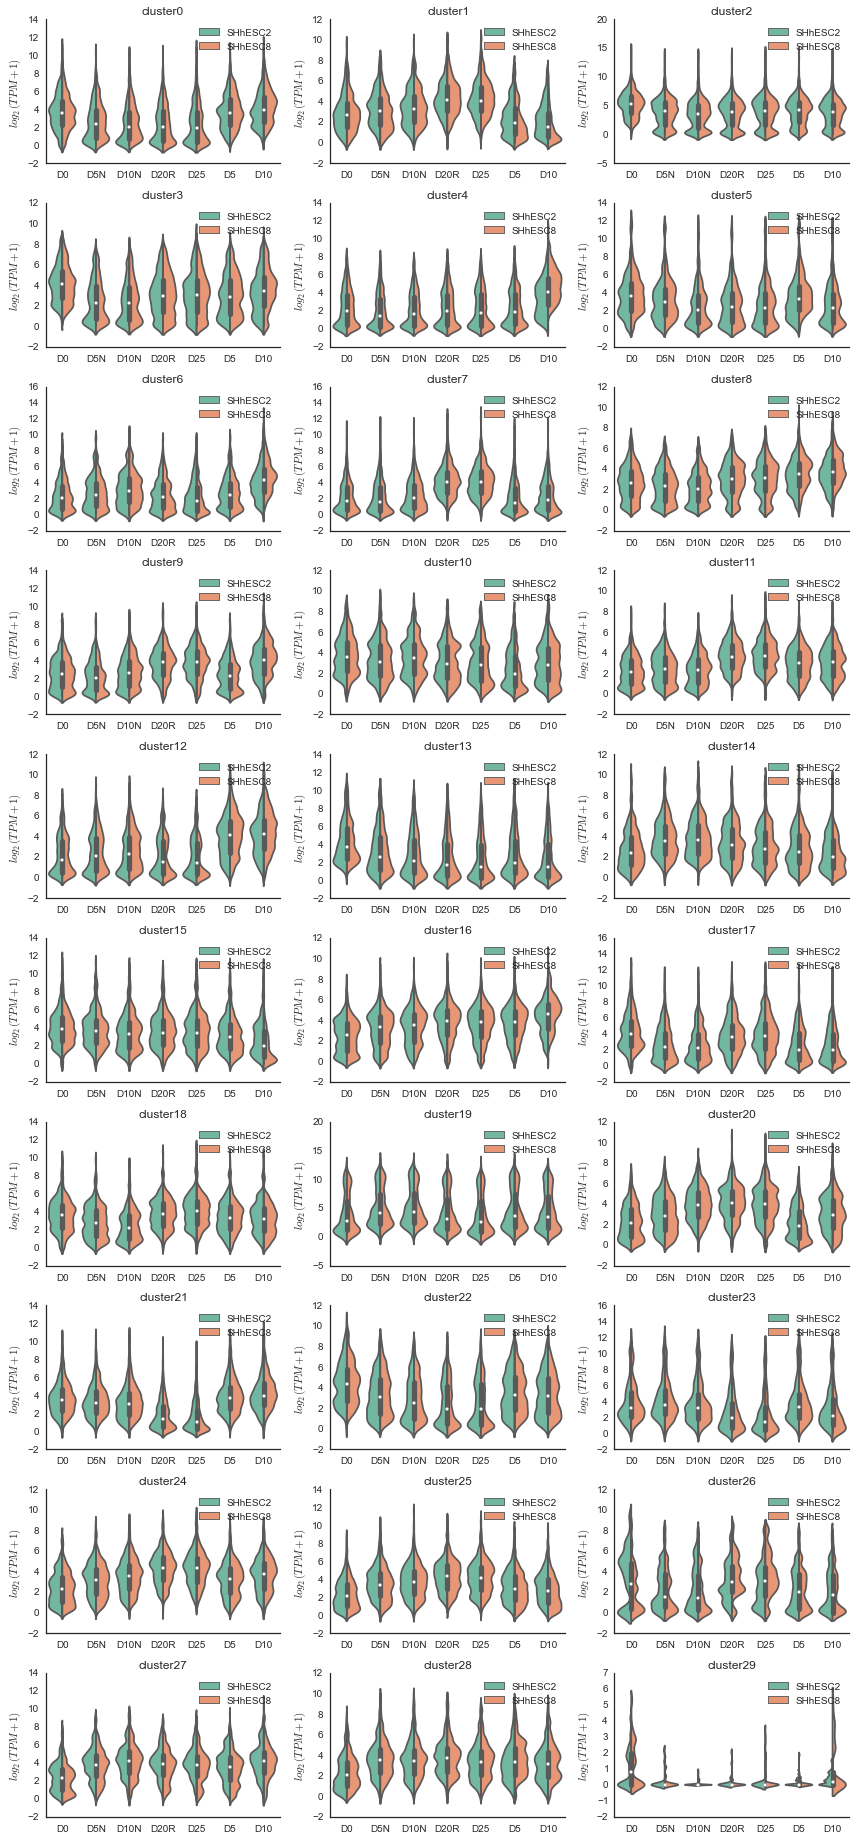

In [46]:

sns.set(style='white',palette='muted')
fig = plt.figure(figsize=(12,28))
for i in np.arange(0,30):
    data  = pd.read_csv("./DEGs_Kmeas/Neual_diff_DEGs_KmeansCluster_"+str(i)+"_log2TPM.csv")
    ax = fig.add_subplot(11,3,i+1)
    sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel(r"$log_2(TPM+1)$ ")
    ax.set_title("cluster"+str(i))
    ax.legend()
sns.despine()
fig.tight_layout()

In [47]:
fig.savefig("./DEGs_Kmeas/Neural_diff_degs_volin_plots_of_cluster3.0_output.pdf")
fig.savefig("./DEGs_Kmeas/Neural_diff_degs_volin_plots_of_cluster3.0_output.png",dpi = 300)

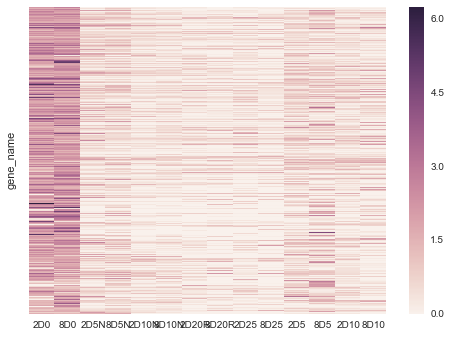

In [156]:
sns.heatmap(degs_log_new.loc[5],yticklabels=False)

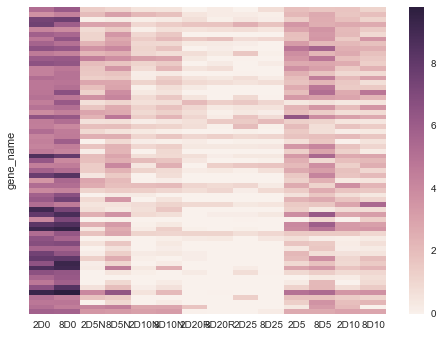

In [157]:
sns.heatmap(degs_log_new.loc[22],yticklabels=False)

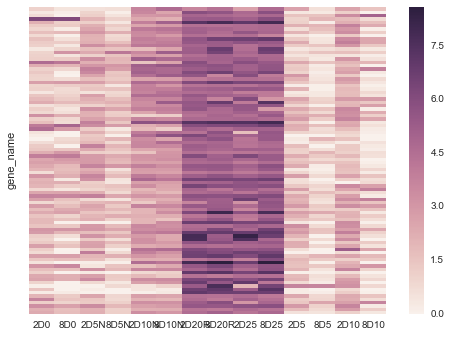

In [158]:
sns.heatmap(degs_log_new.loc[19],yticklabels=False)

In [ ]:
fig = plt.figure(figsize=(12,28))
for i in np.arange(0,33):
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    ax = fig.add_subplot(11,3,i+1)
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel("$log_2(TPM+1)$ ")
    ax.set_title("cluster"+str(i))
    ax.legend()
sns.despine()
fig.tight_layout()
#ax3.set_title("Transcription Factor",fontsize=20)

In [3]:
 data  = pd.read_csv("Neual_diff_DEGs_cluster_22_log2TPM.csv")

In [4]:
data.head()

Unnamed: 0 gene_name   time       TPM time2 cell_line
0           0       GAL    2D0  5.244887    D0   SHhESC2
1           1       GAL    8D0  6.156842    D0   SHhESC8
2           2       GAL   2D5N  1.411426   D5N   SHhESC2
3           3       GAL   8D5N  1.097611   D5N   SHhESC8
4           4       GAL  2D10N  0.584963  D10N   SHhESC2

In [5]:
data2 = data[['gene_name','time','TPM']]
data2.set_index(['gene_name','time'],inplace=True)

In [6]:
data2.head()

TPM
gene_name time           
GAL       2D0    5.244887
          8D0    6.156842
          2D5N   1.411426
          8D5N   1.097611
          2D10N  0.584963

In [7]:
data2 = data[['gene_name','time','TPM']]
data2.set_index(['gene_name','time'],inplace=True)
data3 = data2.unstack()
data3.head()

TPM                                                    \
time             2D0      2D10     2D10N     2D20R      2D25       2D5   
gene_name                                                                
AC005062.2  5.282069  1.500802  1.157044  1.130931  0.704872  1.550901   
AC005682.5  4.001802  1.691534  1.333424  0.731183  0.201634  1.432959   
B3GNT7      5.182295  2.111031  0.263034  0.565597  0.757023  1.963474   
C21orf88    4.263034  2.104337  1.084064  1.049631  0.970854  1.803227   
CKMT1A      4.449561  1.292782  0.432959  0.000000  1.632268  2.107688   

                                                                        \
time            2D5N       8D0      8D10     8D10N     8D20R      8D25   
gene_name                                                                
AC005062.2  1.823749  6.337176  1.035624  1.097611  1.130931  1.028569   
AC005682.5  1.157044  4.246408  1.594549  1.049631  1.070389  0.918386   
B3GNT7      1.361768  4.950002  3.065228  1.316146  0.411426  0.263034   
C21orf88    2.533563  4.618239  1.659925  1.650765  1.286881  1.111031   
CKMT1A      1.443607  4.534809  2.584963  2.495695  1.310340  1.752749   

                                
time             8D5      8D5N  
gene_name                       
AC005062.2  1.500802  2.937344  
AC005682.5  2.620586  1.438293  
B3GNT7      4.560715  1.475085  
C21orf88    1.925999  2.580145  
CKMT1A      3.764474  4.095080

In [8]:
data2 = data[['gene_name','time','TPM']]
data2.set_index(['gene_name','time'],inplace=True)
data3 = data2.unstack()
data3.columns = data3.columns.droplevel(0)

In [9]:
data3.head()

time             2D0      2D10     2D10N     2D20R      2D25       2D5  \
gene_name                                                                
AC005062.2  5.282069  1.500802  1.157044  1.130931  0.704872  1.550901   
AC005682.5  4.001802  1.691534  1.333424  0.731183  0.201634  1.432959   
B3GNT7      5.182295  2.111031  0.263034  0.565597  0.757023  1.963474   
C21orf88    4.263034  2.104337  1.084064  1.049631  0.970854  1.803227   
CKMT1A      4.449561  1.292782  0.432959  0.000000  1.632268  2.107688   

time            2D5N       8D0      8D10     8D10N     8D20R      8D25  \
gene_name                                                                
AC005062.2  1.823749  6.337176  1.035624  1.097611  1.130931  1.028569   
AC005682.5  1.157044  4.246408  1.594549  1.049631  1.070389  0.918386   
B3GNT7      1.361768  4.950002  3.065228  1.316146  0.411426  0.263034   
C21orf88    2.533563  4.618239  1.659925  1.650765  1.286881  1.111031   
CKMT1A      1.443607  4.534809  2.584963  2.495695  1.310340  1.752749   

time             8D5      8D5N  
gene_name                       
AC005062.2  1.500802  2.937344  
AC005682.5  2.620586  1.438293  
B3GNT7      4.560715  1.475085  
C21orf88    1.925999  2.580145  
CKMT1A      3.764474  4.095080

In [10]:
def scale(y, c=True, sc=True):
    '''
    If ‘scale’ is‘TRUE’ then scaling is done by dividing the (centered) columns of
   ‘x’ by their standard deviations if ‘center’ is ‘TRUE’, and the
     root mean square otherwise.  If ‘scale’ is ‘FALSE’, no scaling is done.

     The root-mean-square for a (possibly centered) column is defined
     as sqrt(sum(x^2)/(n-1)), where x is a vector of the non-missing
     values and n is the number of non-missing values.  In the case
     ‘center = TRUE’, this is the same as the standard deviation, but
     in general it is not.
    '''
    x = y.copy()

    if c:
        x -= x.mean()
    if sc and c:
        x /= x.std()
    elif sc:
        x /= np.sqrt(x.pow(2).sum().div(x.count() - 1))
    return x

In [11]:
myscale = scale(data3.T).T
myscale.head()

time             2D0      2D10     2D10N     2D20R      2D25       2D5  \
gene_name                                                                
AC005062.2  1.916207 -0.301997 -0.503656 -0.518974 -0.768913 -0.272607   
AC005682.5  1.985212  0.011816 -0.294077 -0.808502 -1.260835 -0.209055   
B3GNT7      1.807760  0.053392 -1.002222 -0.829392 -0.720045 -0.030896   
C21orf88    1.941105  0.051216 -0.842008 -0.872153 -0.941121 -0.212398   
CKMT1A      1.496073 -0.679111 -1.271573 -1.569904 -0.445187 -0.117599   

time            2D5N       8D0      8D10     8D10N     8D20R      8D25  \
gene_name                                                                
AC005062.2 -0.112546  2.535164 -0.574884 -0.538521 -0.518974 -0.579023   
AC005682.5 -0.444738  2.194151 -0.071028 -0.536489 -0.518757 -0.648596   
B3GNT7     -0.374602  1.675070  0.598448 -0.400663 -0.917457 -1.002222   
C21orf88    0.426994  2.252078 -0.337856 -0.345875 -0.664446 -0.818399   
CKMT1A     -0.575185  1.554812  0.211268  0.149758 -0.667012 -0.362170   

time             8D5      8D5N  
gene_name                       
AC005062.2 -0.301997  0.540722  
AC005682.5  0.805398 -0.204499  
B3GNT7      1.452701 -0.309874  
C21orf88   -0.104914  0.467776  
CKMT1A      1.024012  1.251817

In [12]:
order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']

In [13]:
myscale = myscale[order]

In [14]:
myscale.head()

time             2D0       8D0      2D5N      8D5N     2D10N     8D10N  \
gene_name                                                                
AC005062.2  1.916207  2.535164 -0.112546  0.540722 -0.503656 -0.538521   
AC005682.5  1.985212  2.194151 -0.444738 -0.204499 -0.294077 -0.536489   
B3GNT7      1.807760  1.675070 -0.374602 -0.309874 -1.002222 -0.400663   
C21orf88    1.941105  2.252078  0.426994  0.467776 -0.842008 -0.345875   
CKMT1A      1.496073  1.554812 -0.575185  1.251817 -1.271573  0.149758   

time           2D20R     8D20R      2D25      8D25       2D5       8D5  \
gene_name                                                                
AC005062.2 -0.518974 -0.518974 -0.768913 -0.579023 -0.272607 -0.301997   
AC005682.5 -0.808502 -0.518757 -1.260835 -0.648596 -0.209055  0.805398   
B3GNT7     -0.829392 -0.917457 -0.720045 -1.002222 -0.030896  1.452701   
C21orf88   -0.872153 -0.664446 -0.941121 -0.818399 -0.212398 -0.104914   
CKMT1A     -1.569904 -0.667012 -0.445187 -0.362170 -0.117599  1.024012   

time            2D10      8D10  
gene_name                       
AC005062.2 -0.301997 -0.574884  
AC005682.5  0.011816 -0.071028  
B3GNT7      0.053392  0.598448  
C21orf88    0.051216 -0.337856  
CKMT1A     -0.679111  0.211268

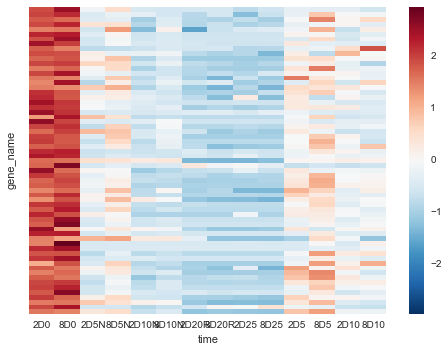

In [15]:
sns.heatmap(myscale,yticklabels=False)

In [17]:
xaxis_order = ['D0','D5N',"D10N","D20R","D25","D5","D10"]

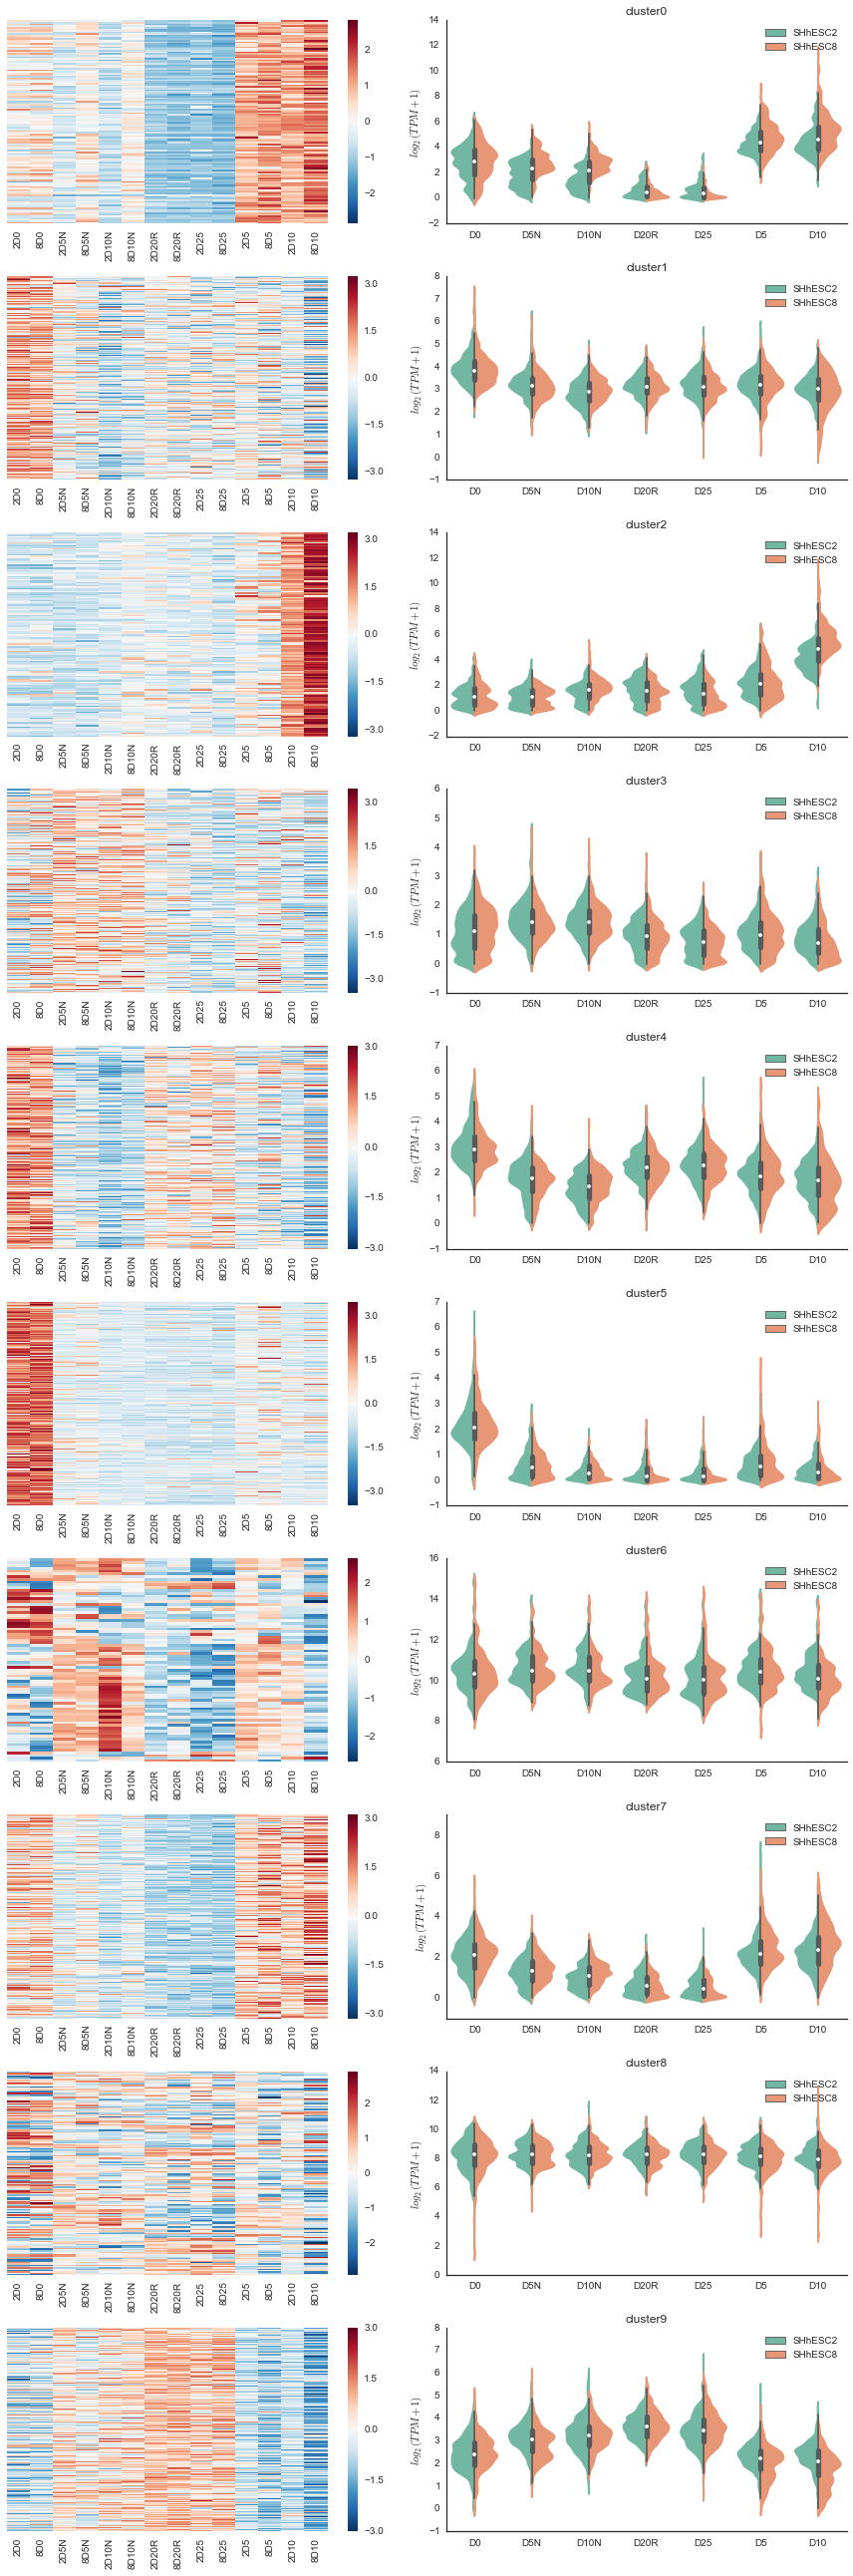

In [40]:
fig,ax = plt.subplots(10,2,figsize=(12,36))
for i in np.arange(0,10):
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    data2 = data[['gene_name','time','TPM']]
    data2.set_index(['gene_name','time'],inplace=True)
    data3 = data2.unstack()
    data3.columns = data3.columns.droplevel(0)
    data3 = data3[order]
    myscale = scale(data3.T).T
    
    sns.heatmap(myscale,yticklabels=False,ax=ax[i,0])
    ax[i,0].set_xlabel("")
    ax[i,0].set_ylabel("")
    
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
    ax[i,1].set_xlabel("")
    ax[i,1].set_ylabel("$log_2(TPM+1)$ ")
    ax[i,1].set_title("cluster"+str(i))
    ax[i,1].legend()
    ax[i,1].spines['top'].set_visible(False)
    #ax.xaxis.set_ticks_position('bottom')
    ax[i,1].spines['right'].set_visible(False)
#sns.despine()
fig.tight_layout()


In [41]:
fig.savefig("Neural_diff_degs_kmeans_clusters_0-9.PNG",dpi=300)

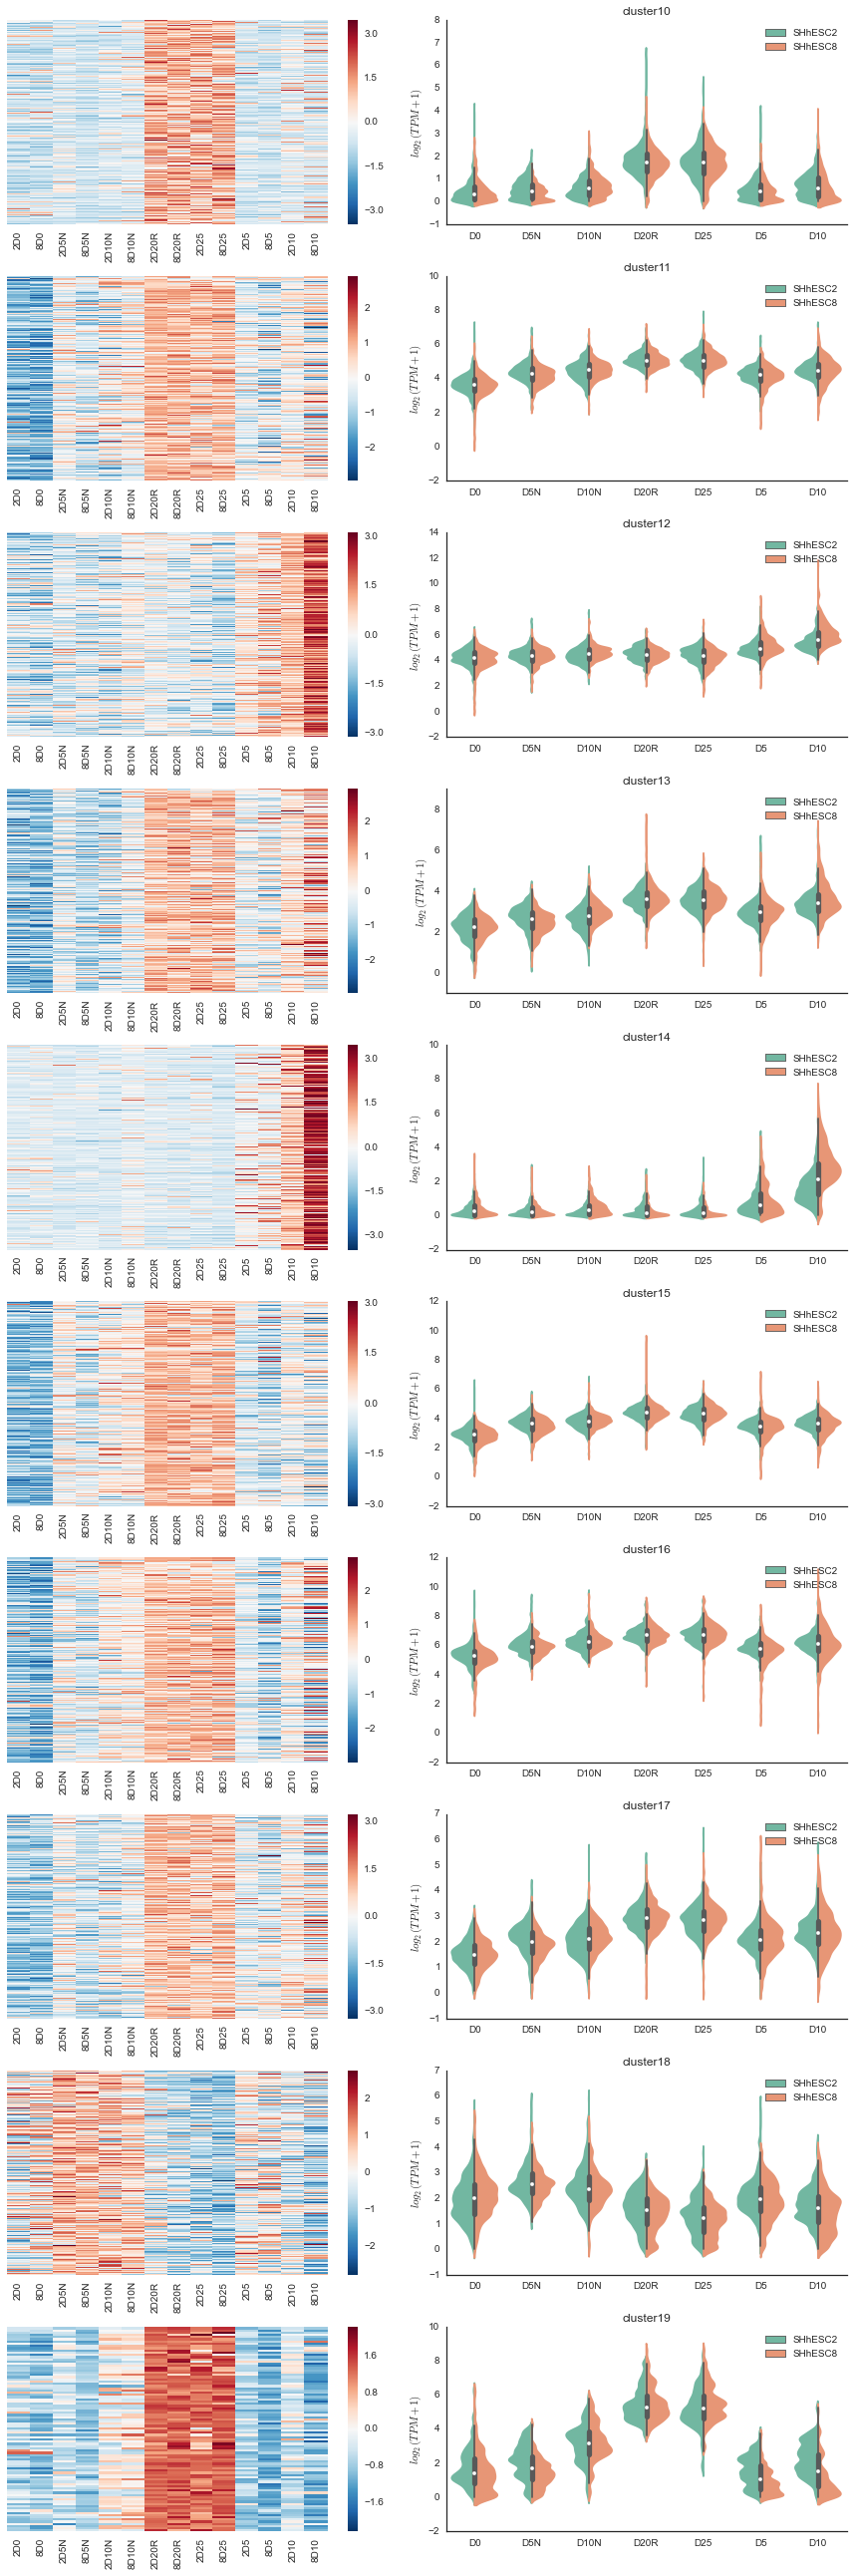

In [38]:

fig,ax = plt.subplots(10,2,figsize=(12,36))
for i in np.arange(0,10):
    m = i+10
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(m)+"_log2TPM.csv")
    data2 = data[['gene_name','time','TPM']]
    data2.set_index(['gene_name','time'],inplace=True)
    data3 = data2.unstack()
    data3.columns = data3.columns.droplevel(0)
    data3 = data3[order]
    myscale = scale(data3.T).T
   
    sns.heatmap(myscale,yticklabels=False,ax=ax[i,0])
    ax[i,0].set_xlabel("")
    ax[i,0].set_ylabel("")
   
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
    ax[i,1].set_xlabel("")
    ax[i,1].set_ylabel("$log_2(TPM+1)$ ")
    ax[i,1].set_title("cluster"+str(m))
    ax[i,1].legend()
    ax[i,1].spines['top'].set_visible(False)
    #ax.xaxis.set_ticks_position('bottom')
    ax[i,1].spines['right'].set_visible(False)
#sns.despine()
fig.tight_layout()

In [39]:
fig.savefig("Neural_diff_degs_kmeans_clusters_10-19.PNG",dpi=300)

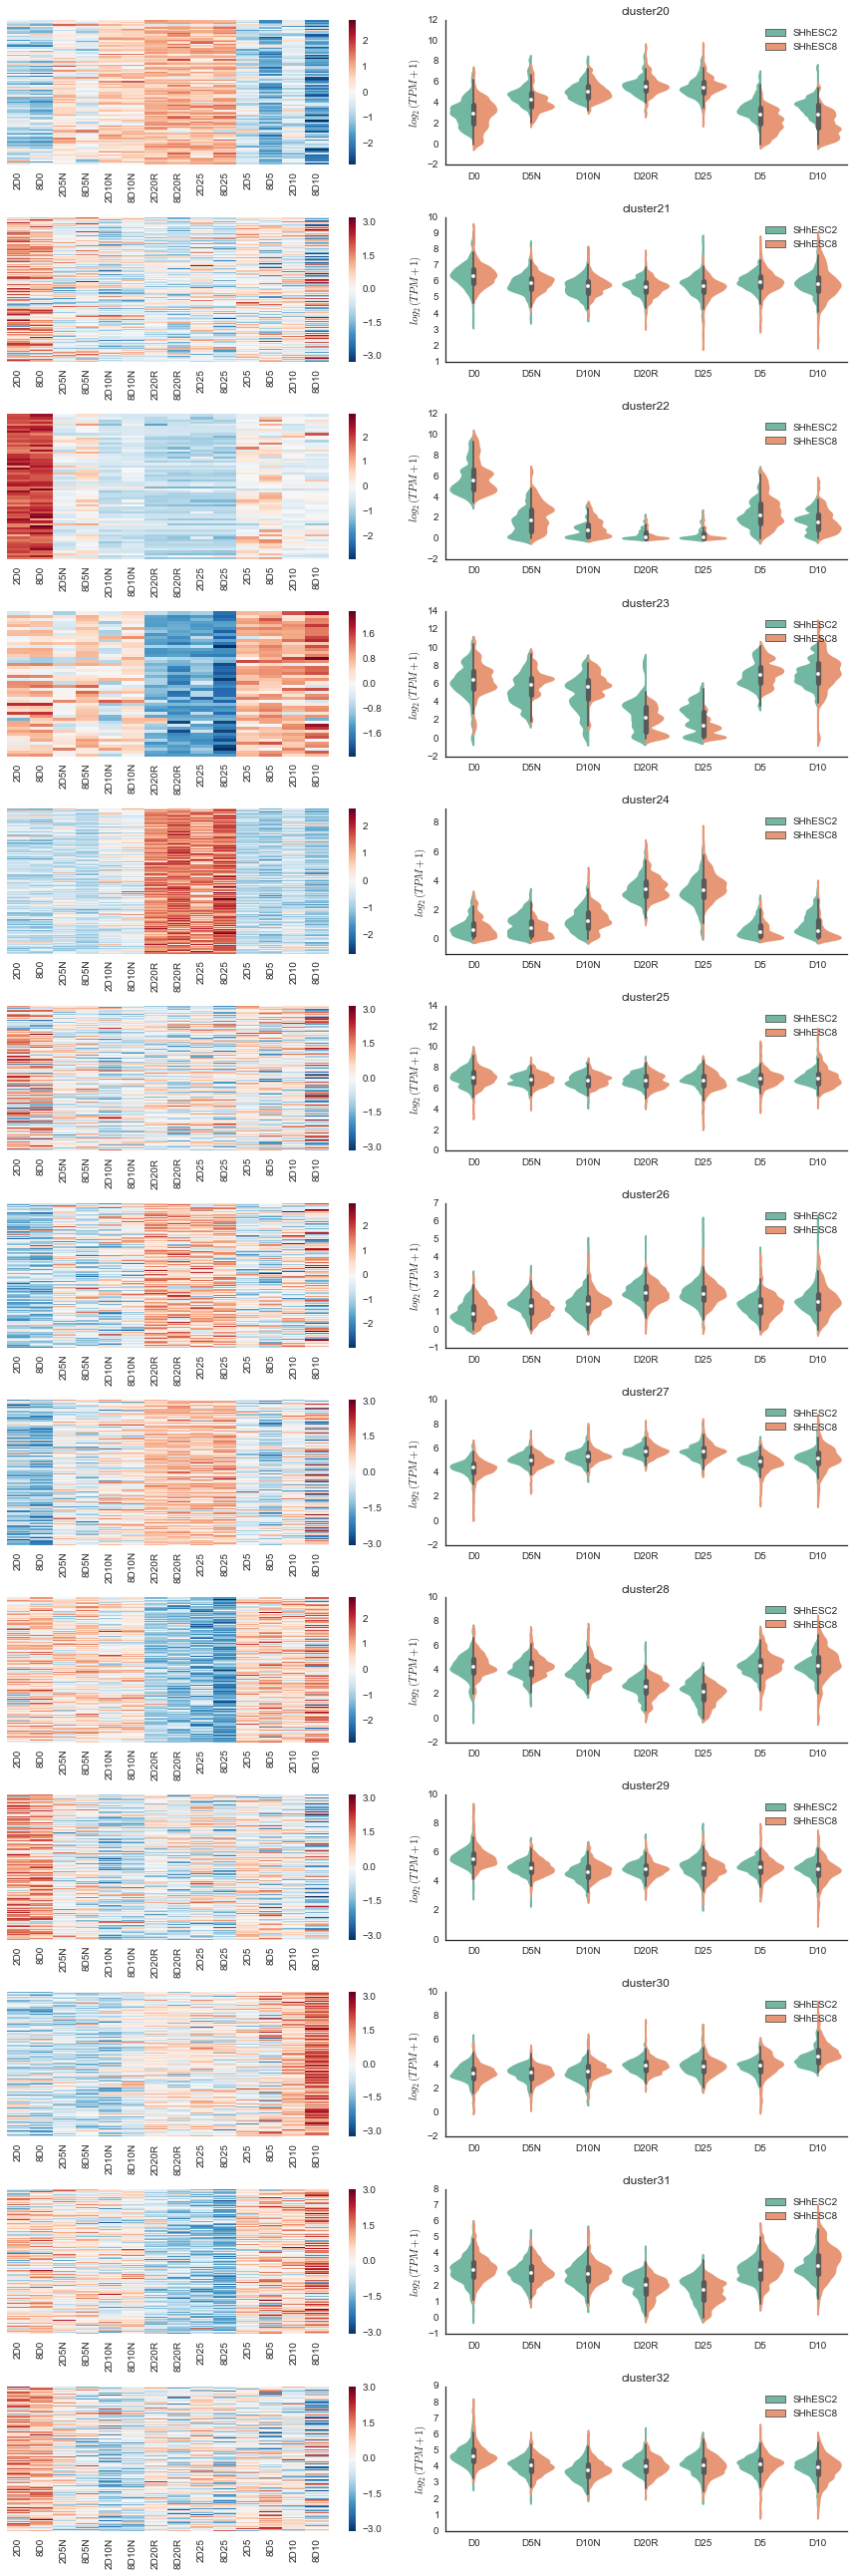

In [36]:

fig,ax = plt.subplots(13,2,figsize=(12,36))
for i in np.arange(0,13):
    m = i+20
    data  = pd.read_csv("Neual_diff_DEGs_cluster_"+str(m)+"_log2TPM.csv")
    data2 = data[['gene_name','time','TPM']]
    data2.set_index(['gene_name','time'],inplace=True)
    data3 = data2.unstack()
    data3.columns = data3.columns.droplevel(0)
    data3 = data3[order]
    myscale = scale(data3.T).T
    ax[i,1]
    sns.heatmap(myscale,yticklabels=False,ax=ax[i,0])
    ax[i,0].set_xlabel("")
    ax[i,0].set_ylabel("")
    sns.violinplot(x="time2", y="TPM",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
    ax[i,1].set_xlabel("")
    ax[i,1].set_ylabel("$log_2(TPM+1)$ ")
    ax[i,1].set_title("cluster"+str(m))
    ax[i,1].legend()
    ax[i,1].spines['top'].set_visible(False)
    #ax.xaxis.set_ticks_position('bottom')
    ax[i,1].spines['right'].set_visible(False)
#sns.despine()
fig.tight_layout()

In [37]:
fig.savefig("Neural_diff_degs_kmeans_clusters_20-33.PNG",dpi=300)

In [3]:
order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']
xaxis_order = ['D0','D5N',"D10N","D20R","D25","D5","D10"]

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


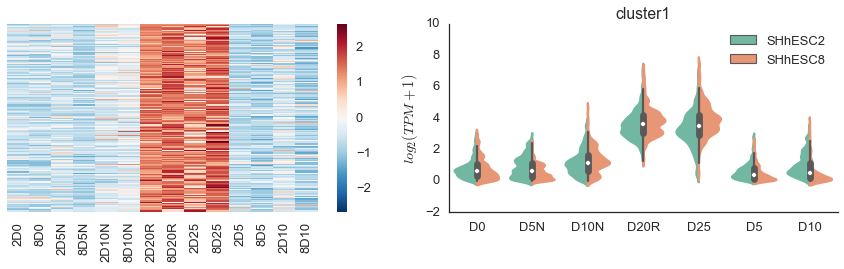

In [6]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_1_log2TPM.csv")
data2 = data[['gene_name','time','log2(TPM+1)']]
data2.set_index(['gene_name','time'],inplace=True)
data3 = data2.unstack()
data3.columns = data3.columns.droplevel(0)
data3 = data3[order]
myscale = scale(data3.T).T

sns.heatmap(myscale,yticklabels=False,ax=ax[0])
ax[0].set_xlabel("")
ax[0].set_ylabel("")
sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[1])
ax[1].set_xlabel("")
ax[1].set_ylabel("$log_2(TPM+1)$ ")
ax[1].set_title("cluster"+str(1))
ax[1].legend()
ax[1].spines['top'].set_visible(False)
#ax.xaxis.set_ticks_position('bottom')
ax[1].spines['right'].set_visible(False)
#sns.despine()
fig.tight_layout()

In [9]:
import scipy.cluster.vq as scv
import scipy.cluster.hierarchy as sch

In [7]:
def cluster(i = 0):
    xaxis_order = ['D0','D5N',"D10N","D20R","D25","D5","D10"]
    order = [ '2D0', '8D0','2D5N','8D5N', '2D10N','8D10N','2D20R','8D20R', '2D25','8D25','2D5','8D5','2D10','8D10']
    fig,ax = plt.subplots(1,2,figsize=(12,4))

    data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(i)+"_log2TPM.csv")
    data2 = data[['gene_name','time','log2(TPM+1)']]
    data2.set_index(['gene_name','time'],inplace=True)
    data3 = data2.unstack()
    data3.columns = data3.columns.droplevel(0)
    data3 = data3[order]
    myscale = scale(data3.T).T
    
    
    Z = sch.linkage(myscale,'ward')
    D = sch.dendrogram(Z, no_plot=True)
    index = D['leaves']
    
    sns.heatmap(myscale.iloc[index],yticklabels=False,ax=ax[0])
    ax[0].set_xlabel("")
    ax[0].set_ylabel("")
    
    sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[1])
    ax[1].set_xlabel("")
    ax[1].set_ylabel(r"$Log_2(TPM+1)$ ")
    ax[1].set_title("cluster"+str(i))
    ax[1].legend()
    ax[1].spines['top'].set_visible(False)
    #ax.xaxis.set_ticks_position('bottom')
    ax[1].spines['right'].set_visible(False)
    #sns.despine()
    fig.tight_layout()

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


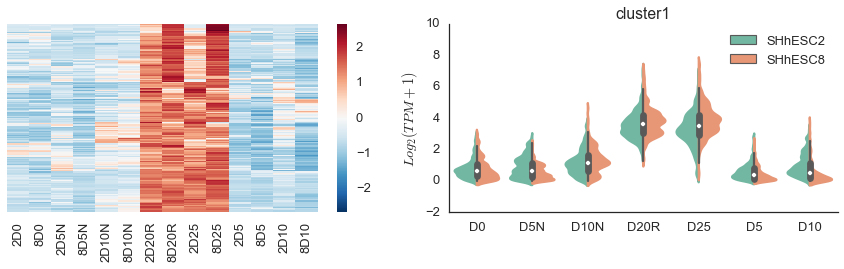

In [10]:
cluster(1)

In [22]:
def kmeans_plot(array):
    '''
    array: 1D array or list like
    '''
    fig_num = len(array)
    fig,ax = plt.subplots(fig_num,2,figsize=(12,fig_num*4))
    for i,m in enumerate(array):
        
        data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(m)+"_log2TPM.csv")
        data2 = data[['gene_name','time','log2(TPM+1)']]
        data2.set_index(['gene_name','time'],inplace=True)
        data3 = data2.unstack()
        data3.columns = data3.columns.droplevel(0)
        data3 = data3[order]
        myscale = scale(data3.T).T
    
        # hierachical clustering inside each cluster
        Z = sch.linkage(myscale,'ward')
        D = sch.dendrogram(Z, no_plot=True)
        index = D['leaves']
    
        sns.heatmap(myscale.iloc[index],yticklabels=False,ax=ax[i,0])
        ax[i,0].set_xlabel("")
        ax[i,0].set_ylabel("")
    
        sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
        ax[i,1].set_xlabel("")
        ax[i,1].set_ylabel(r"$Log_2(TPM+1)$ ")
        ax[i,1].set_title("Cluster"+str(m))
        ax[i,1].legend()
        ax[i,1].spines['top'].set_visible(False)
        #ax.xaxis.set_ticks_position('bottom')
        ax[i,1].spines['right'].set_visible(False)
        #sns.despine()
    fig.tight_layout()
    return fig
    #fig.savefig("./DEGs_Kmeans/kmeans_cluster.png",dpi=300)

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


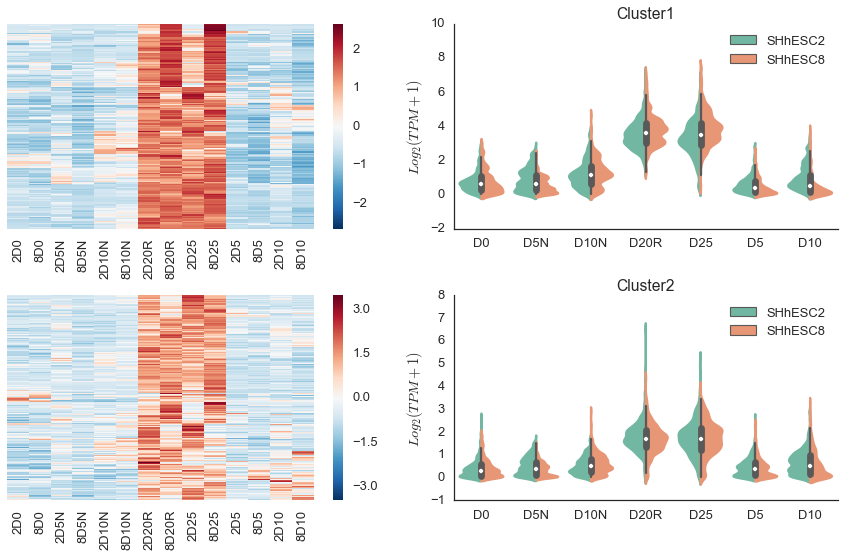

In [21]:
arr = [1,2]
fig = kmeans_plot(arr)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_NPC_sigature.png",dpi=300)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_NPC_sigature.pdf")


D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


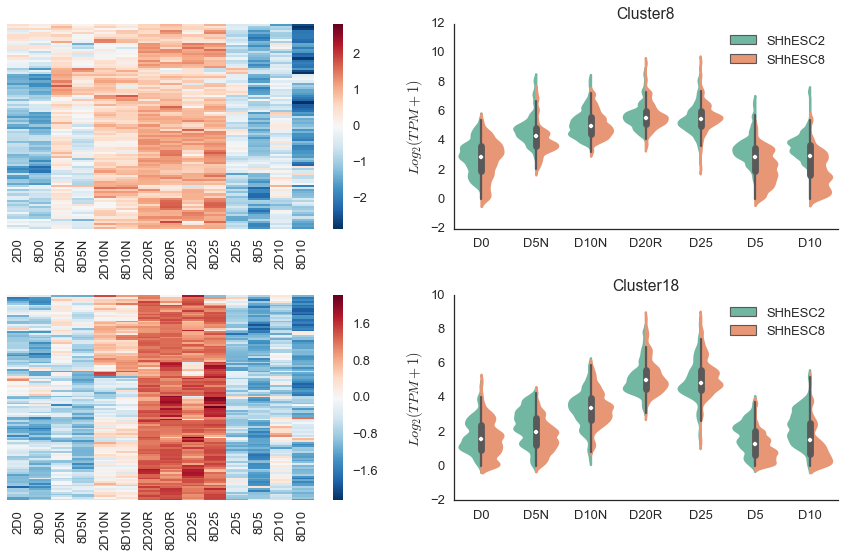

In [28]:
arr = [8,18]
fig = kmeans_plot(arr)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_d5d10npc_sigature.png",dpi=300)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_d5d10npc_sigature.pdf")

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


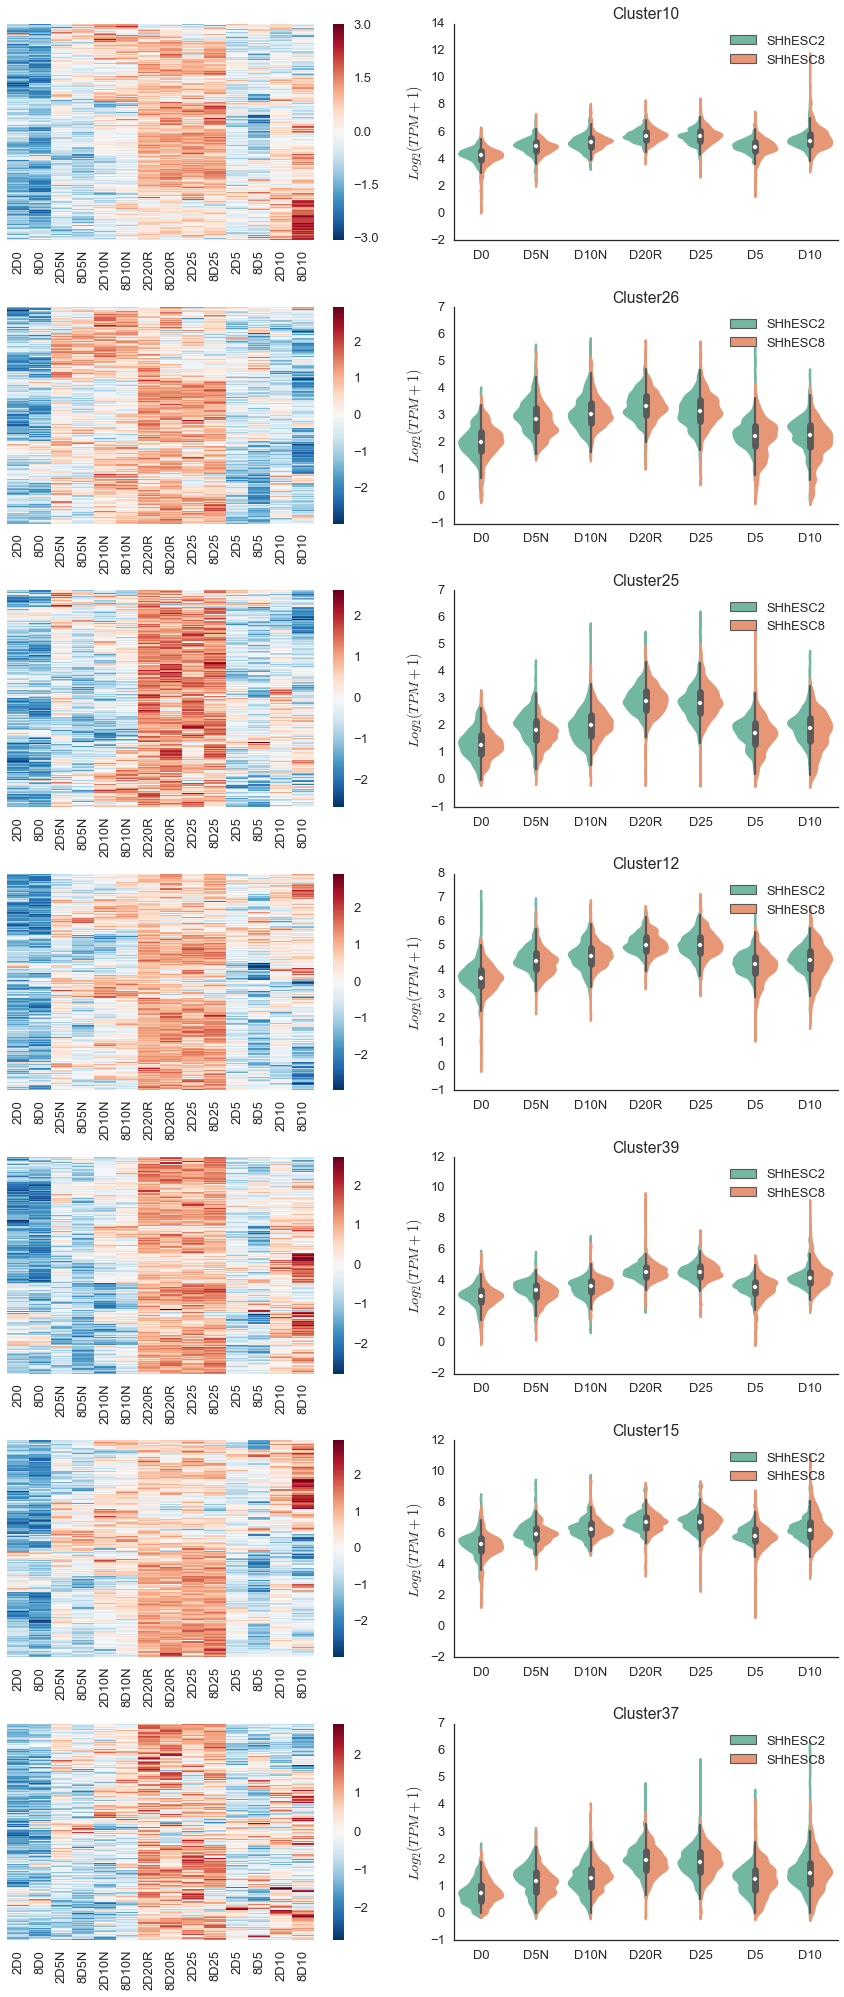

In [25]:

arr = [10,26,25,12,39,15,37]
fig = kmeans_plot(arr)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_NPC2_sigature.png",dpi=300)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_NPC2_sigature.pdf")

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


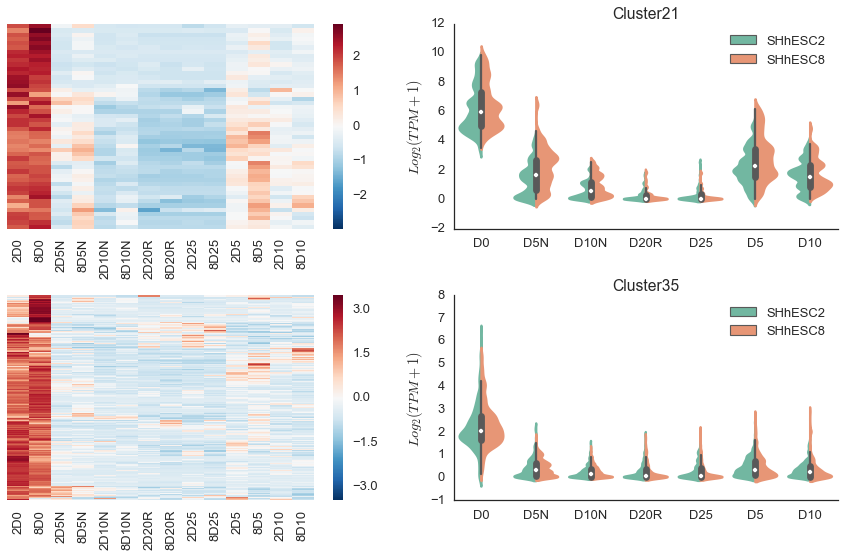

In [26]:

arr = [21,35]
fig = kmeans_plot(arr)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_ESC_sigature.png",dpi=300)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_ESC_sigature.pdf")

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


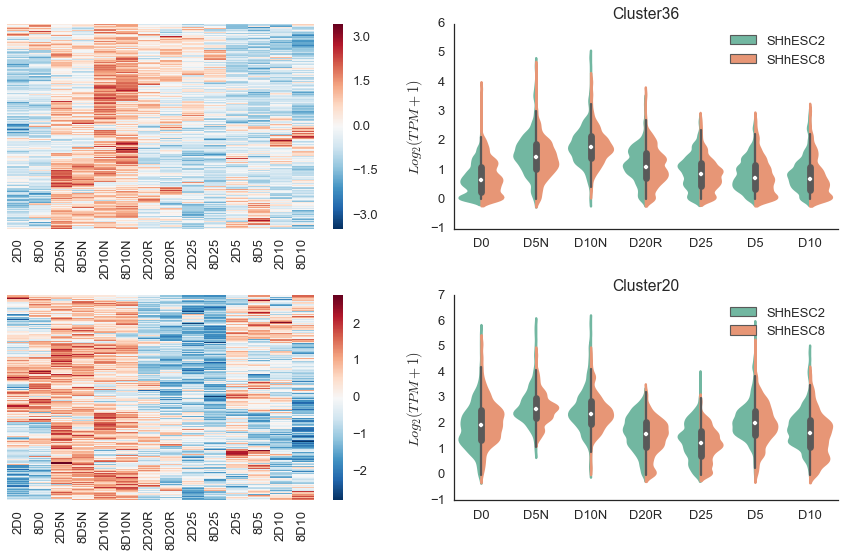

In [29]:

arr = [36,20]
fig = kmeans_plot(arr)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_d5d10_sigature.png",dpi=300)
fig.savefig("./DEGs_Kmeans/Neural_diff_DEG_kmeans_d5d10_sigature.pdf")

In [30]:
def kmeans_plot2(array):
    '''
    array: 1D array or list like
    '''
    fig_num = len(array)
    fig,ax = plt.subplots(fig_num,2,figsize=(12,fig_num*4))
    for i,m in enumerate(array):
        
        data  = pd.read_csv("./DEGs_Kmeans/Neual_diff_DEGs_cluster_"+str(m)+"_log2TPM.csv")
        data2 = data[['gene_name','time','log2(TPM+1)']]
        data2.set_index(['gene_name','time'],inplace=True)
        data3 = data2.unstack()
        data3.columns = data3.columns.droplevel(0)
        data3 = data3[order]
        myscale = scale(data3.T).T
    
        # hierachical clustering inside each cluster
        #Z = sch.linkage(myscale,'ward')
        #D = sch.dendrogram(Z, no_plot=True)
        #index = D['leaves']
    
        #sns.heatmap(myscale.iloc[index],yticklabels=False,ax=ax[i,0])
        sns.heatmap(myscale,yticklabels=False,ax=ax[i,0])
        ax[i,0].set_xlabel("")
        ax[i,0].set_ylabel("")
    
        sns.violinplot(x="time2", y="log2(TPM+1)",  hue="cell_line", data=data,palette="Set2", 
                     split=True,scale="count", scale_hue=False,order=xaxis_order,bw=.2,ax = ax[i,1])
        ax[i,1].set_xlabel("")
        ax[i,1].set_ylabel(r"$Log_2(TPM+1)$ ")
        ax[i,1].set_title("Cluster"+str(m))
        ax[i,1].legend()
        ax[i,1].spines['top'].set_visible(False)
        #ax.xaxis.set_ticks_position('bottom')
        ax[i,1].spines['right'].set_visible(False)
        #sns.despine()
    fig.tight_layout()
    return fig
    #fig.savefig("./DEGs_Kmeans/kmeans_cluster.png",dpi=300)

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


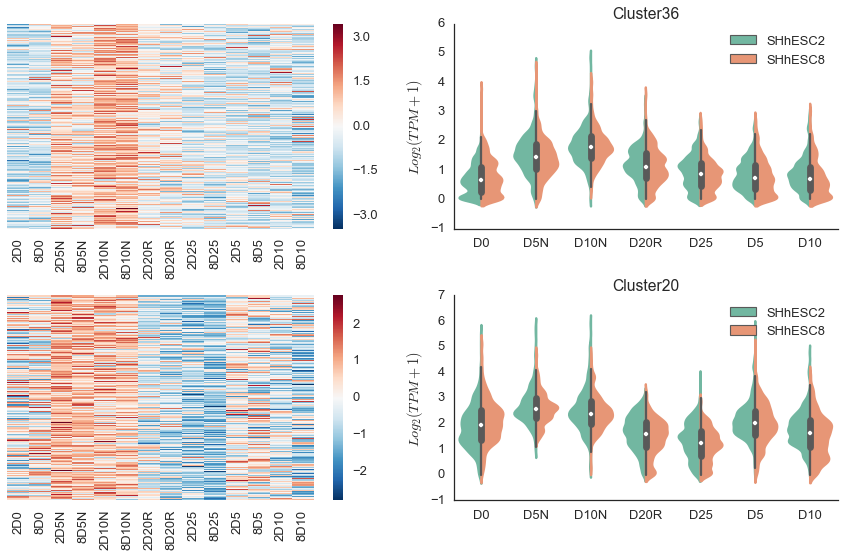

In [32]:
fig = kmeans_plot2([36,20])

D:\Anaconda\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


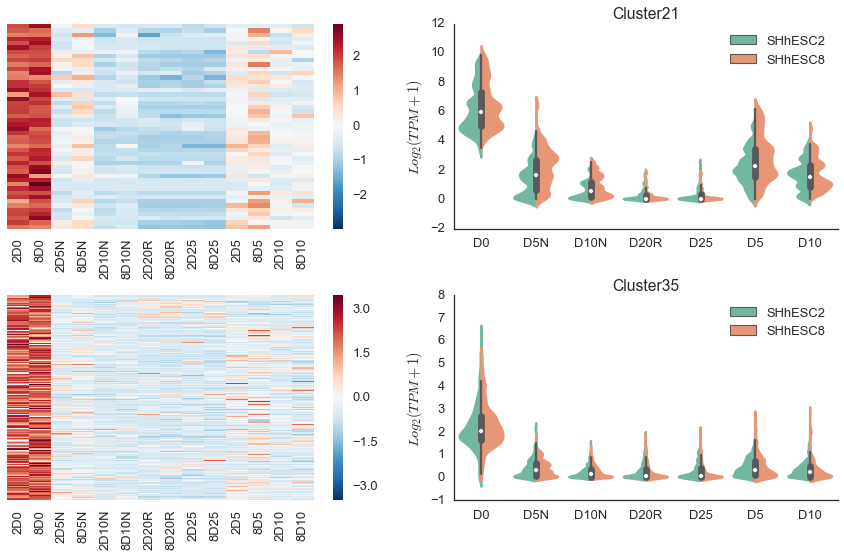

In [33]:
arr = [21,35]
fig = kmeans_plot2(arr)